In [1]:
import pandas as pd

# Function to preprocess and handle mixed datetime formats
def preprocess_dataframe(df):
    # Convert Time to datetime, inferring format for mixed formats
    df['Time'] = pd.to_datetime(df['Time'], format='mixed', errors='coerce')
    
    # Drop rows with invalid Time values
    df = df.dropna(subset=['Time'])
    
    # Sort by Time to ensure proper order
    df = df.sort_values(by='Time')
    
    # Forward-fill missing values for Setpoint and Valve Percent Open
    df['Inj Gas Meter Volume Setpoint'] = df['Inj Gas Meter Volume Setpoint'].fillna(method='ffill')
    df['Inj Gas Valve Percent Open'] = df['Inj Gas Valve Percent Open'].fillna(method='ffill')
    
    # Create new features
    df['Volume Deviation'] = df['Inj Gas Meter Volume Setpoint'] - df['Inj Gas Meter Volume Instantaneous']
    epsilon = 1e-5  # Avoid division by zero
    df['Valve Efficiency'] = df['Inj Gas Meter Volume Instantaneous'] / (df['Inj Gas Valve Percent Open'] + epsilon)
    
    return df


In [2]:
import os
import pandas as pd

directory_path = "data/"  # Replace with your directory path

# Updated preprocess_dataframe function goes here.

# Process all CSV files in the directory
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    print(f"Processing file: {csv_file}")
    
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Preprocess the data
    cleaned_df = preprocess_dataframe(df)
    
    # Save the cleaned data
    cleaned_file_path = os.path.join(directory_path, f"cleaned_{csv_file}")
    cleaned_df.to_csv(cleaned_file_path, index=False)
    print(f"Cleaned file saved as: {cleaned_file_path}")


Processing file: Resolute_728H-10_14-10_21.csv
Cleaned file saved as: data/cleaned_Resolute_728H-10_14-10_21.csv
Processing file: Courageous_729H-09_25-09_28.csv
Cleaned file saved as: data/cleaned_Courageous_729H-09_25-09_28.csv
Processing file: Gallant_102H-10_04-10_11.csv


/var/folders/hj/yvqd6fk50qbg72p7140xxl2w0000gn/T/ipykernel_4417/1371903982.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Inj Gas Meter Volume Setpoint'] = df['Inj Gas Meter Volume Setpoint'].fillna(method='ffill')
/var/folders/hj/yvqd6fk50qbg72p7140xxl2w0000gn/T/ipykernel_4417/1371903982.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Inj Gas Valve Percent Open'] = df['Inj Gas Valve Percent Open'].fillna(method='ffill')
/var/folders/hj/yvqd6fk50qbg72p7140xxl2w0000gn/T/ipykernel_4417/1371903982.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Inj Gas Meter Volume Setpoint'] = df['Inj Gas Meter Volume Setpoint'].fillna(method='ffill')
/var/folders/hj/yvqd6fk50qbg72p7140xxl2w0000gn/T/ipykernel_4417/

Cleaned file saved as: data/cleaned_Gallant_102H-10_04-10_11.csv
Processing file: Fearless_709H-10_31-11_07.csv
Cleaned file saved as: data/cleaned_Fearless_709H-10_31-11_07.csv
Processing file: Bold_744H-10_31-11_07.csv
Cleaned file saved as: data/cleaned_Bold_744H-10_31-11_07.csv
Processing file: Noble_4H-10_24-10_29.csv
Cleaned file saved as: data/cleaned_Noble_4H-10_24-10_29.csv
Processing file: Valiant_505H-09_22-09_30.csv
Cleaned file saved as: data/cleaned_Valiant_505H-09_22-09_30.csv
Processing file: Ruthless_745H-10_01-10_08.csv
Cleaned file saved as: data/cleaned_Ruthless_745H-10_01-10_08.csv
Processing file: Steadfast_505H-10_30-11_07.csv
Cleaned file saved as: data/cleaned_Steadfast_505H-10_30-11_07.csv


/var/folders/hj/yvqd6fk50qbg72p7140xxl2w0000gn/T/ipykernel_4417/1371903982.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Inj Gas Meter Volume Setpoint'] = df['Inj Gas Meter Volume Setpoint'].fillna(method='ffill')
/var/folders/hj/yvqd6fk50qbg72p7140xxl2w0000gn/T/ipykernel_4417/1371903982.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Inj Gas Valve Percent Open'] = df['Inj Gas Valve Percent Open'].fillna(method='ffill')
/var/folders/hj/yvqd6fk50qbg72p7140xxl2w0000gn/T/ipykernel_4417/1371903982.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Inj Gas Meter Volume Setpoint'] = df['Inj Gas Meter Volume Setpoint'].fillna(method='ffill')
/var/folders/hj/yvqd6fk50qbg72p7140xxl2w0000gn/T/ipykernel_4417/

Processing file: cleaned_Noble_4H-10_24-10_29.csv


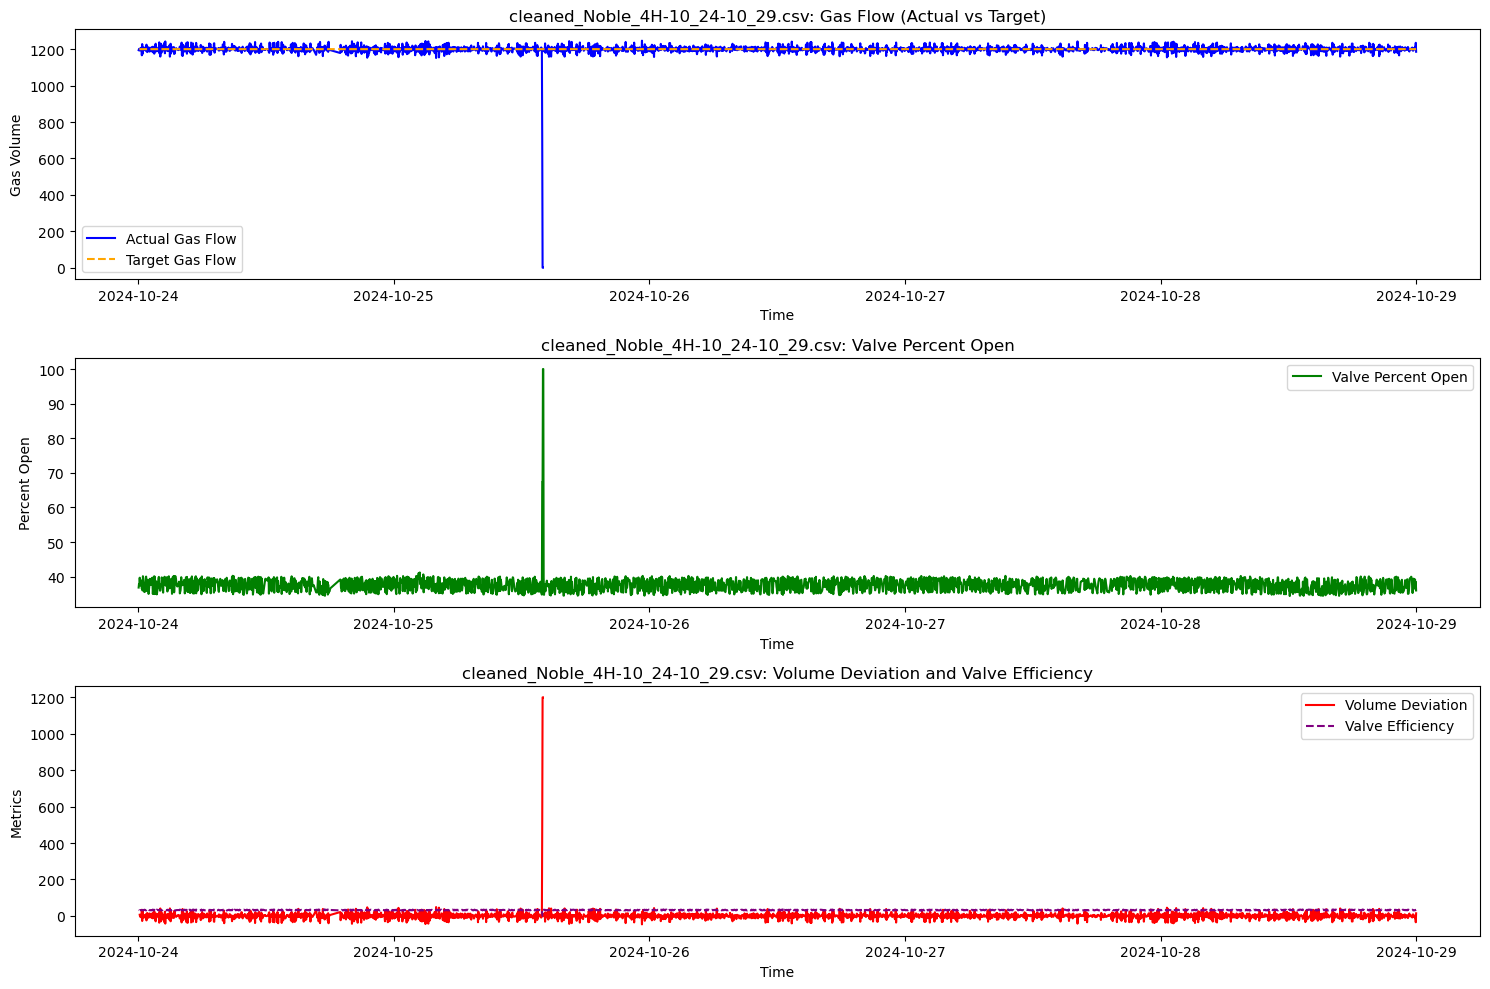

Processing file: cleaned_Valiant_505H-09_22-09_30.csv


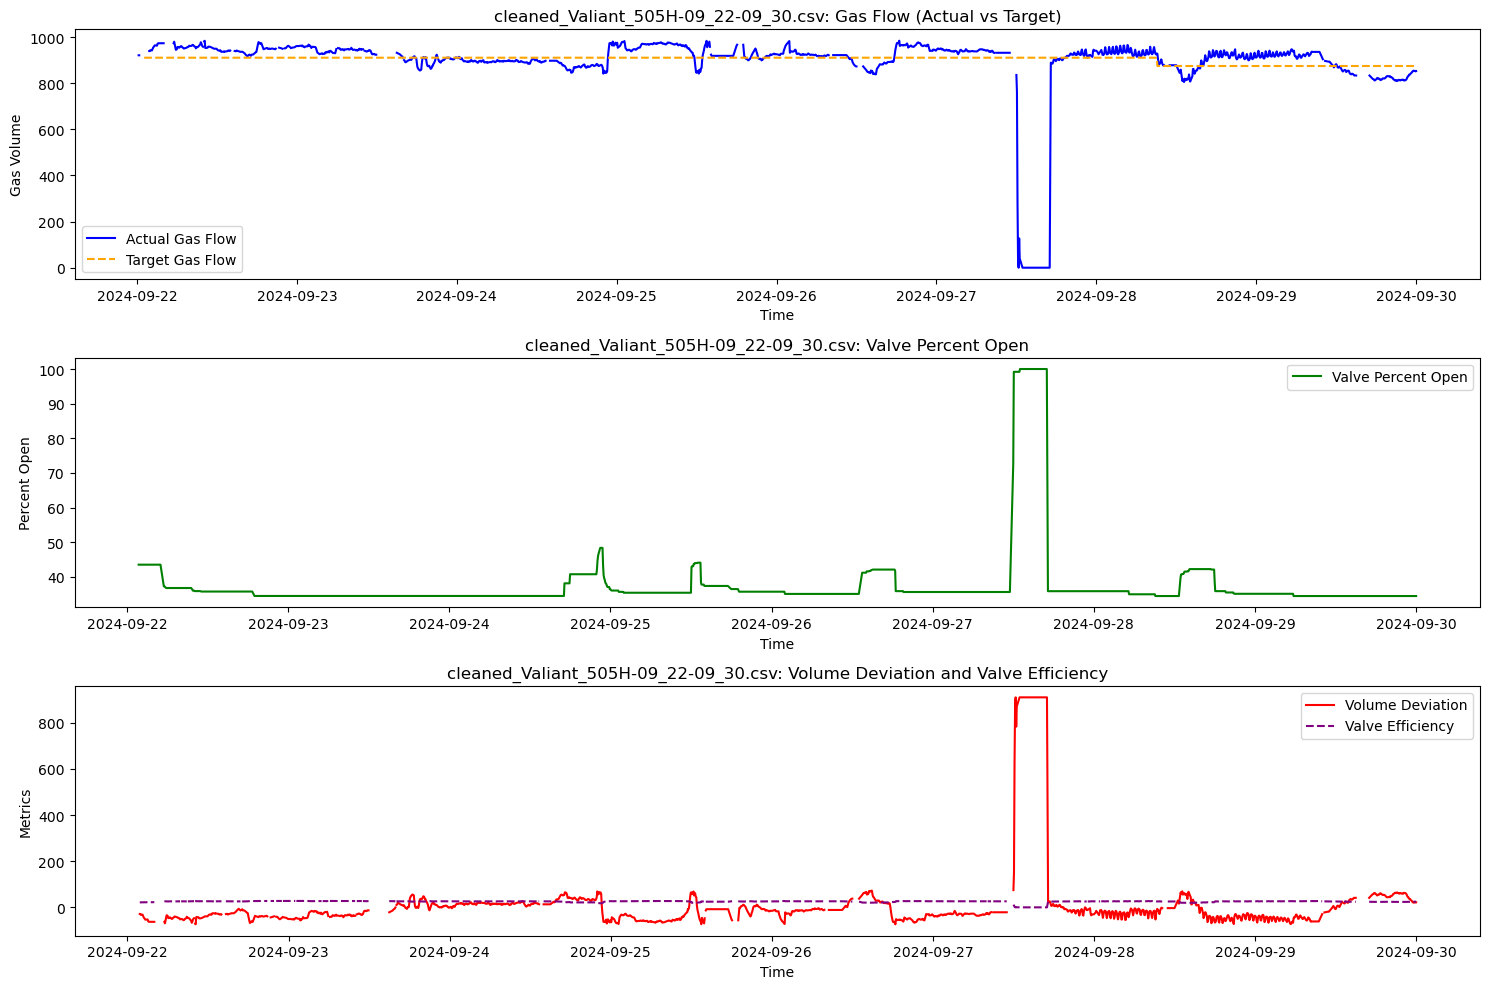

Processing file: cleaned_Ruthless_745H-10_01-10_08.csv


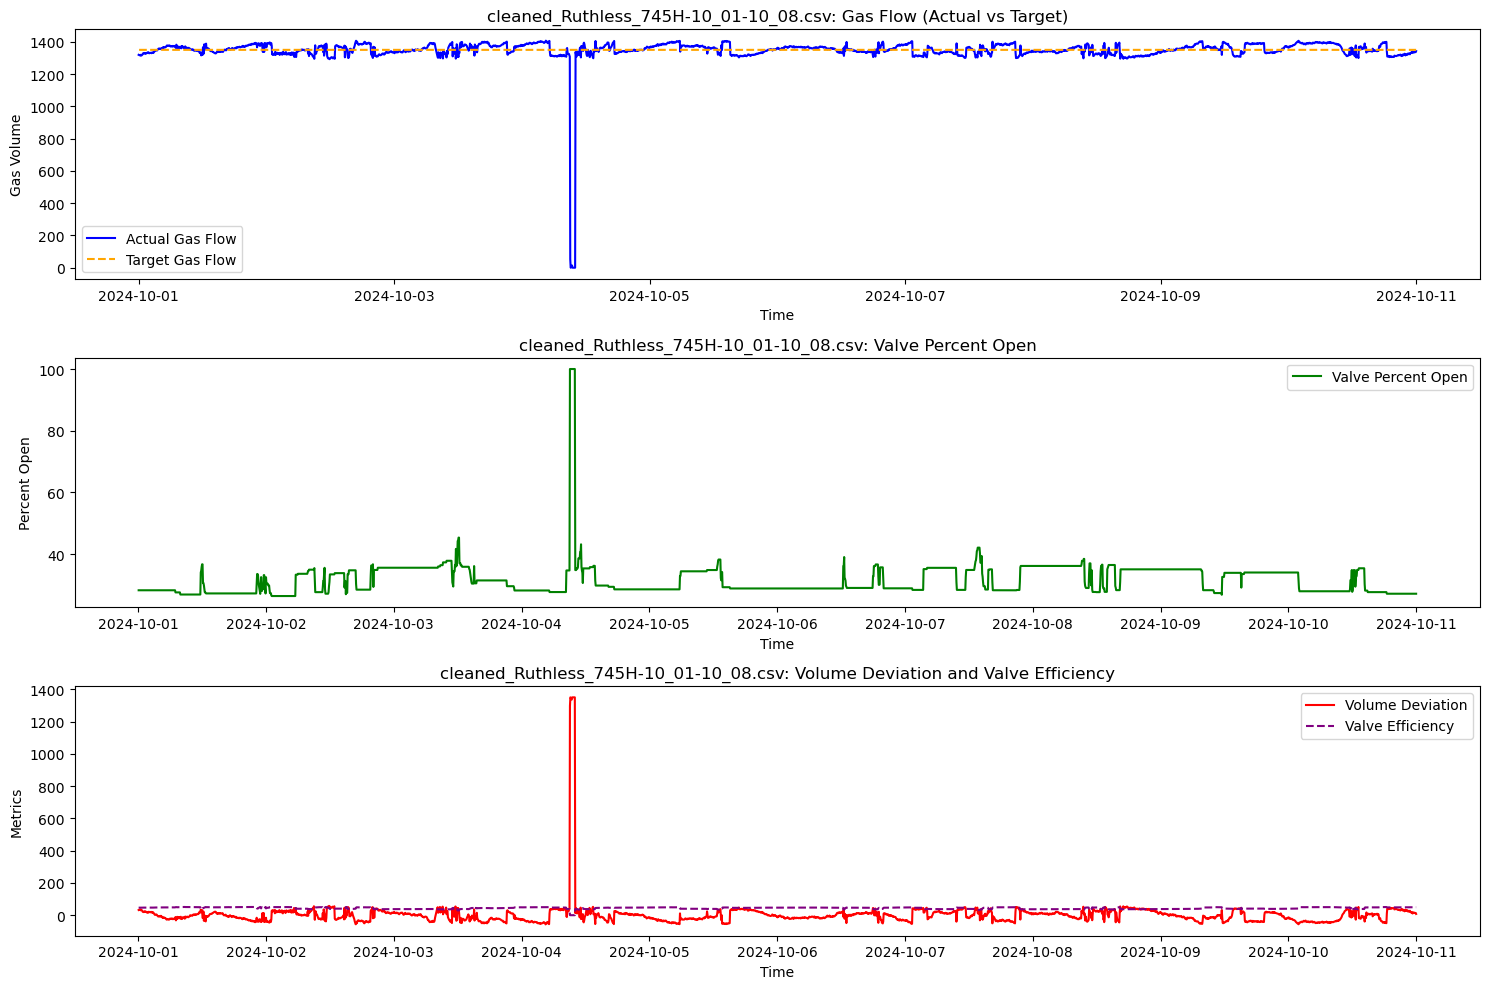

Processing file: cleaned_Courageous_729H-09_25-09_28.csv


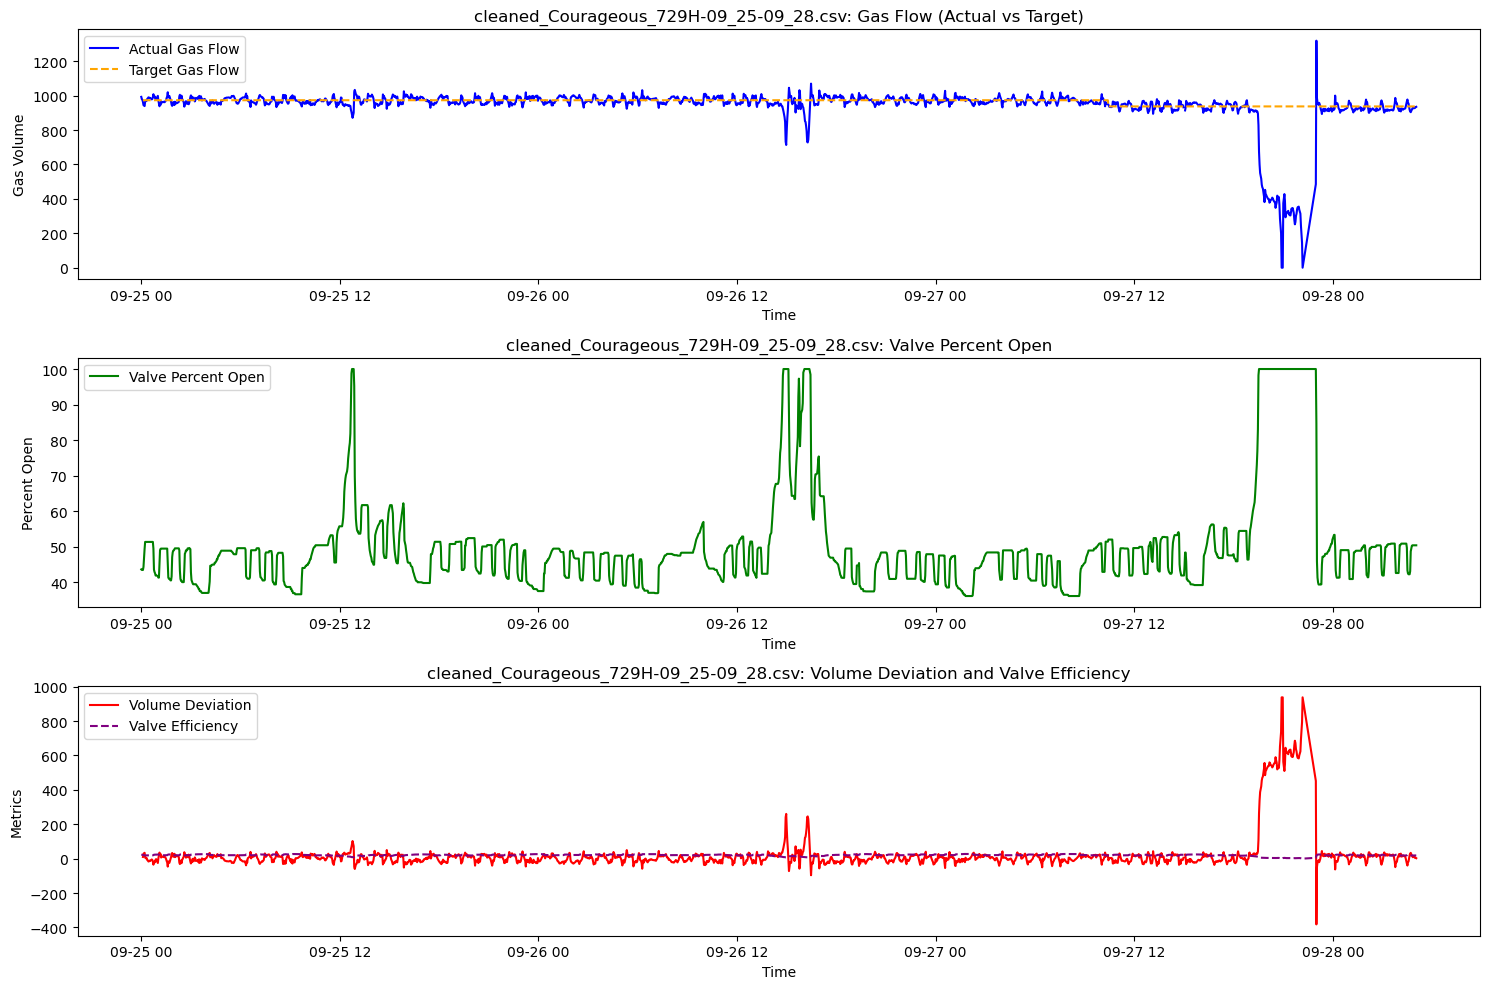

Processing file: cleaned_Resolute_728H-10_14-10_21.csv


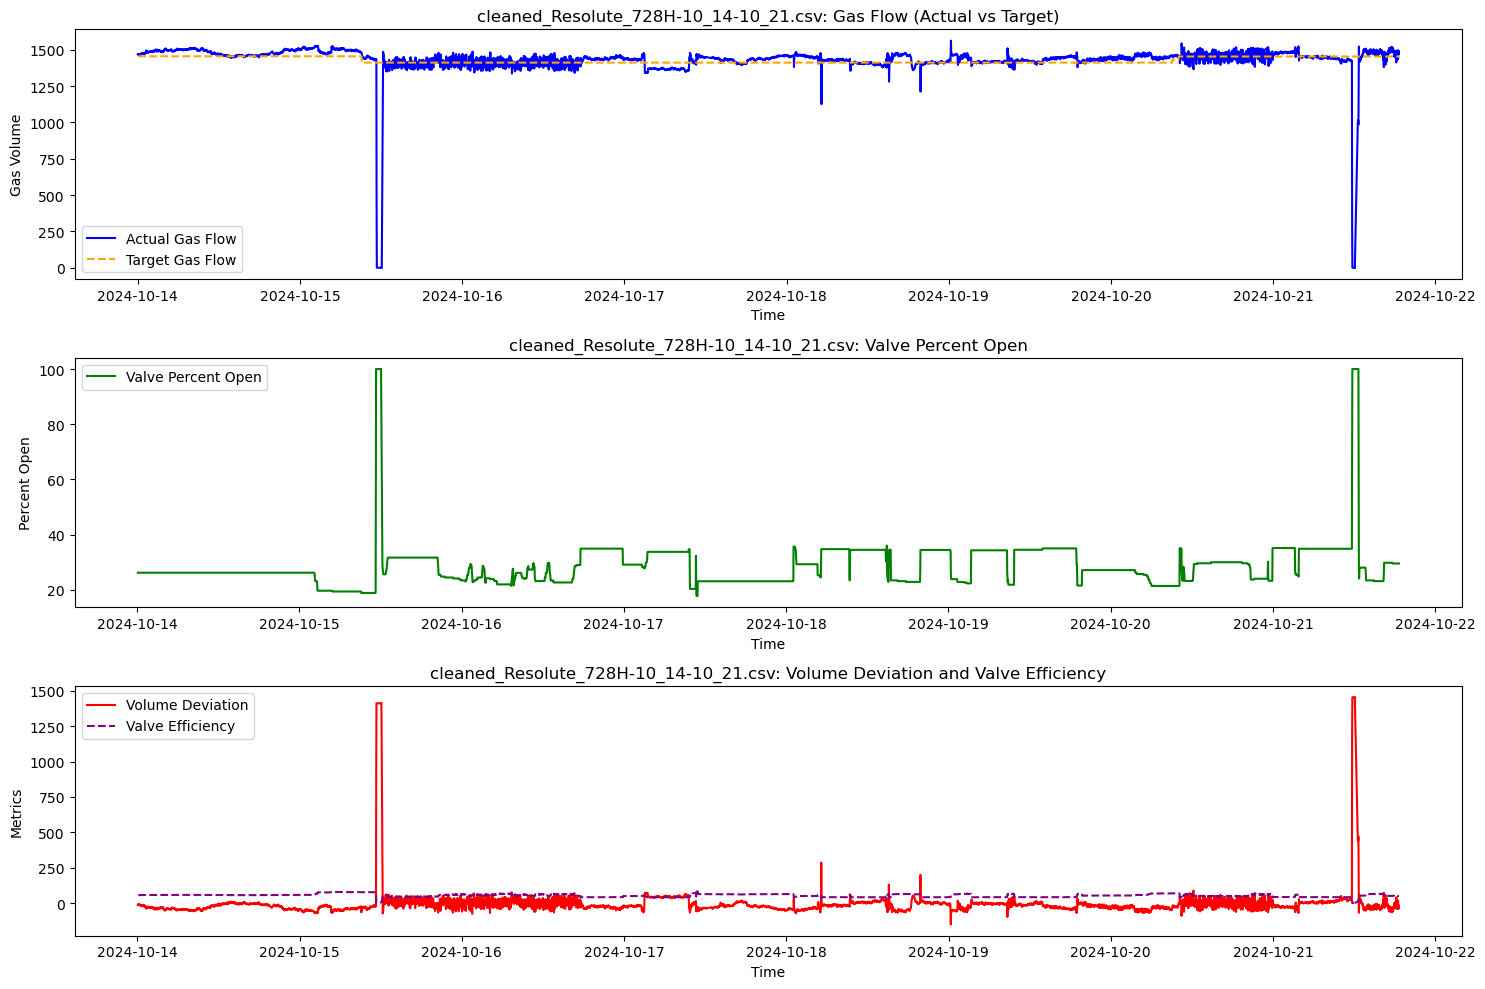

Processing file: cleaned_Gallant_102H-10_04-10_11.csv


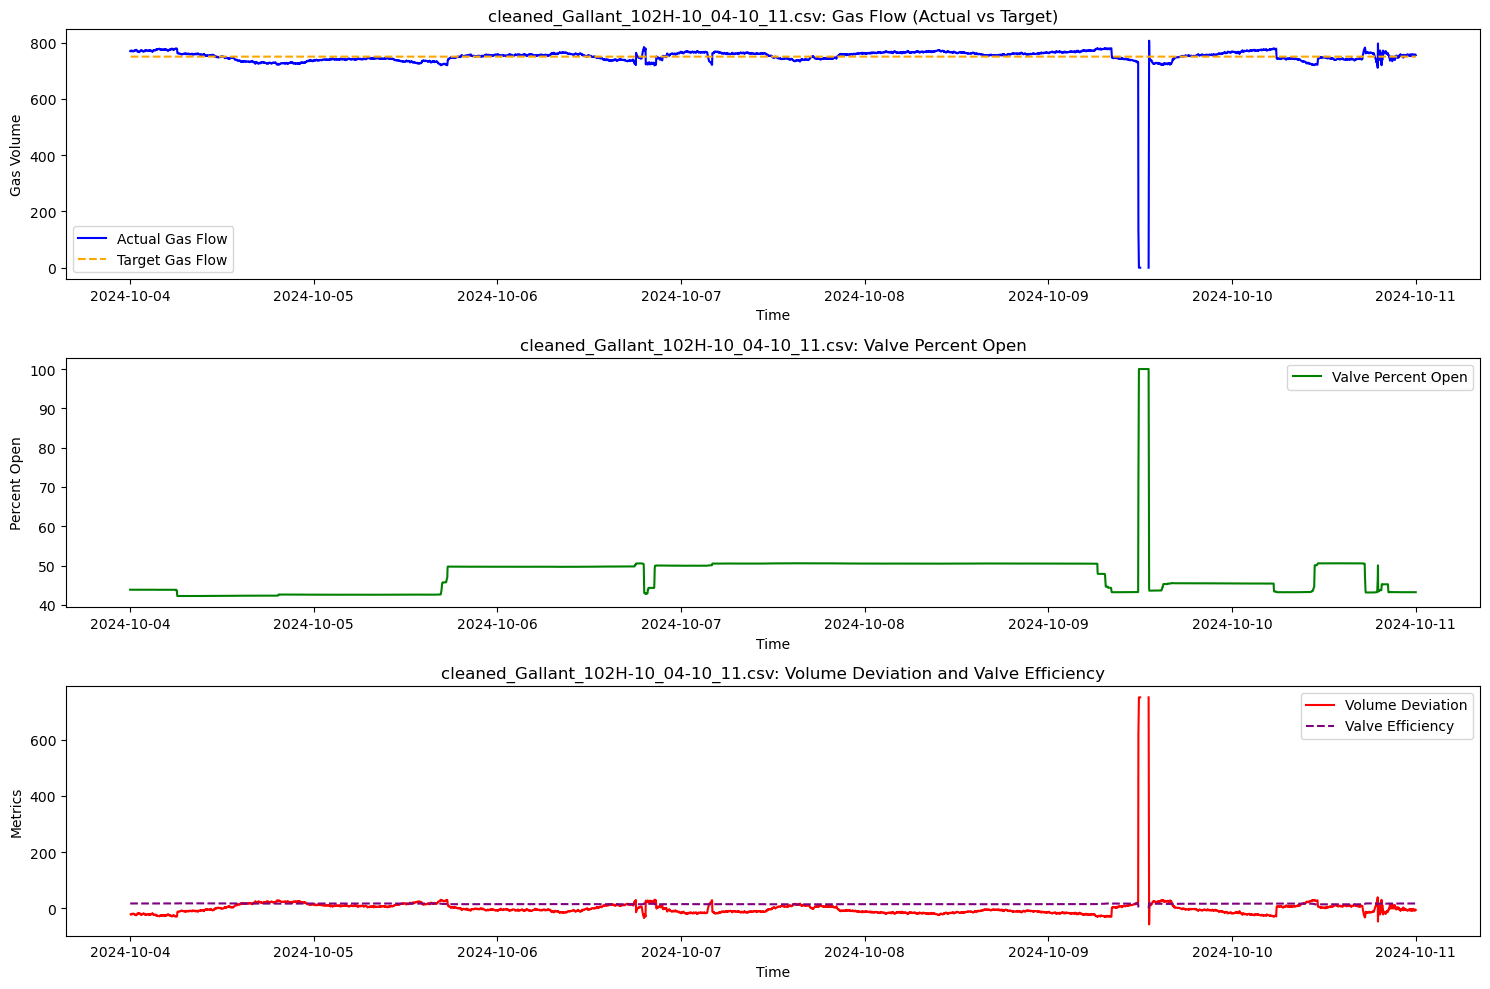

Processing file: cleaned_Steadfast_505H-10_30-11_07.csv


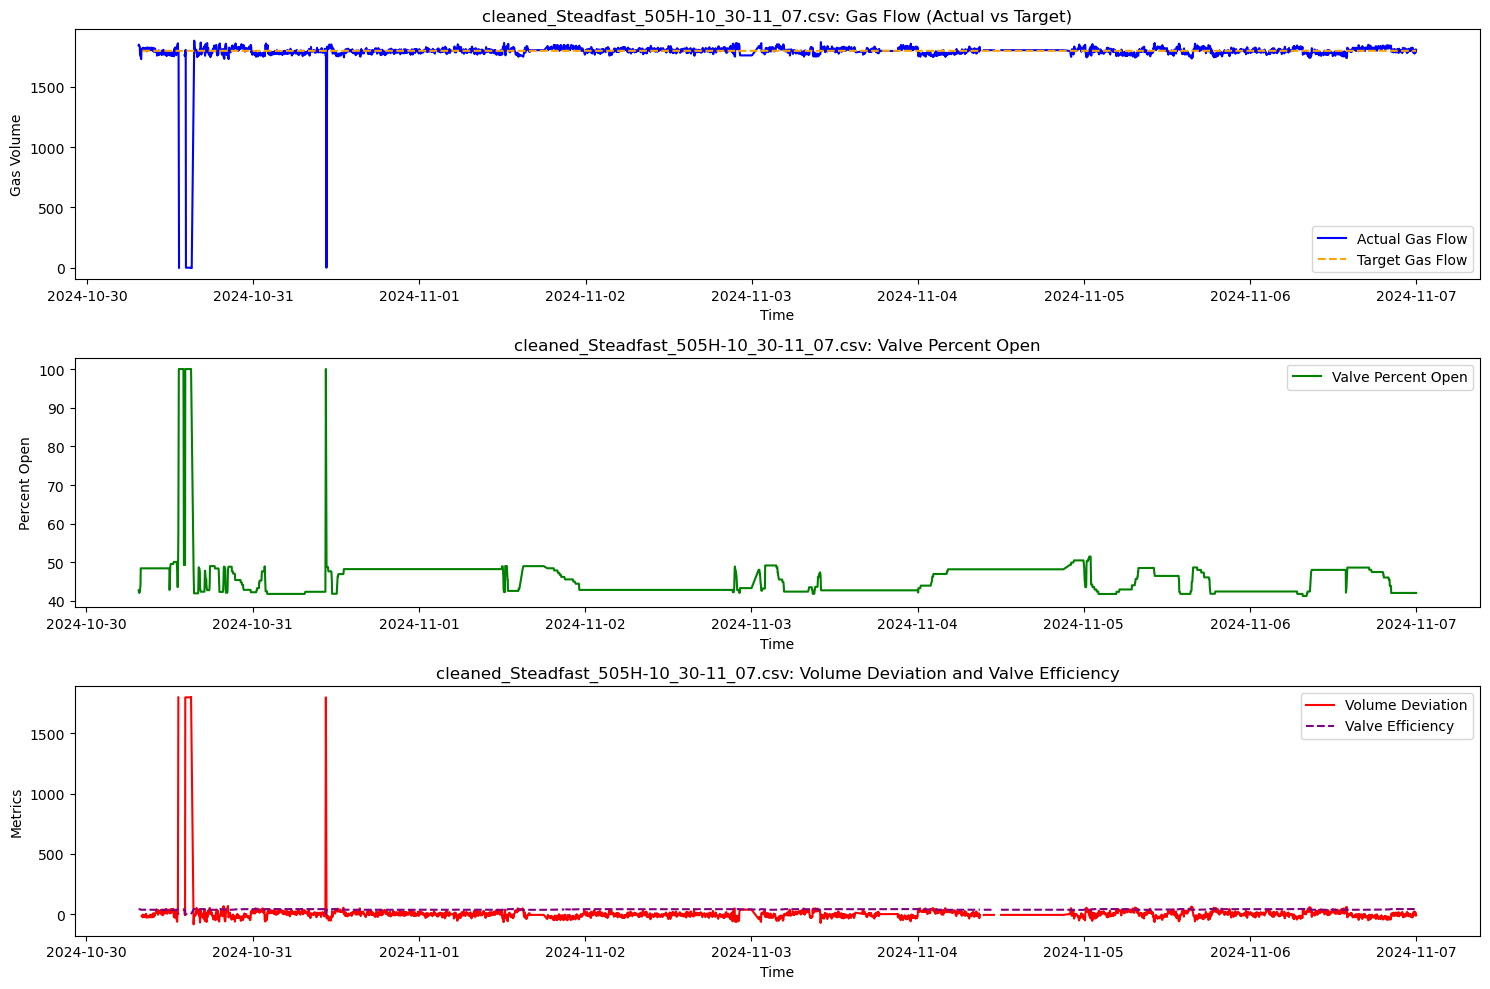

Processing file: cleaned_Bold_744H-10_31-11_07.csv


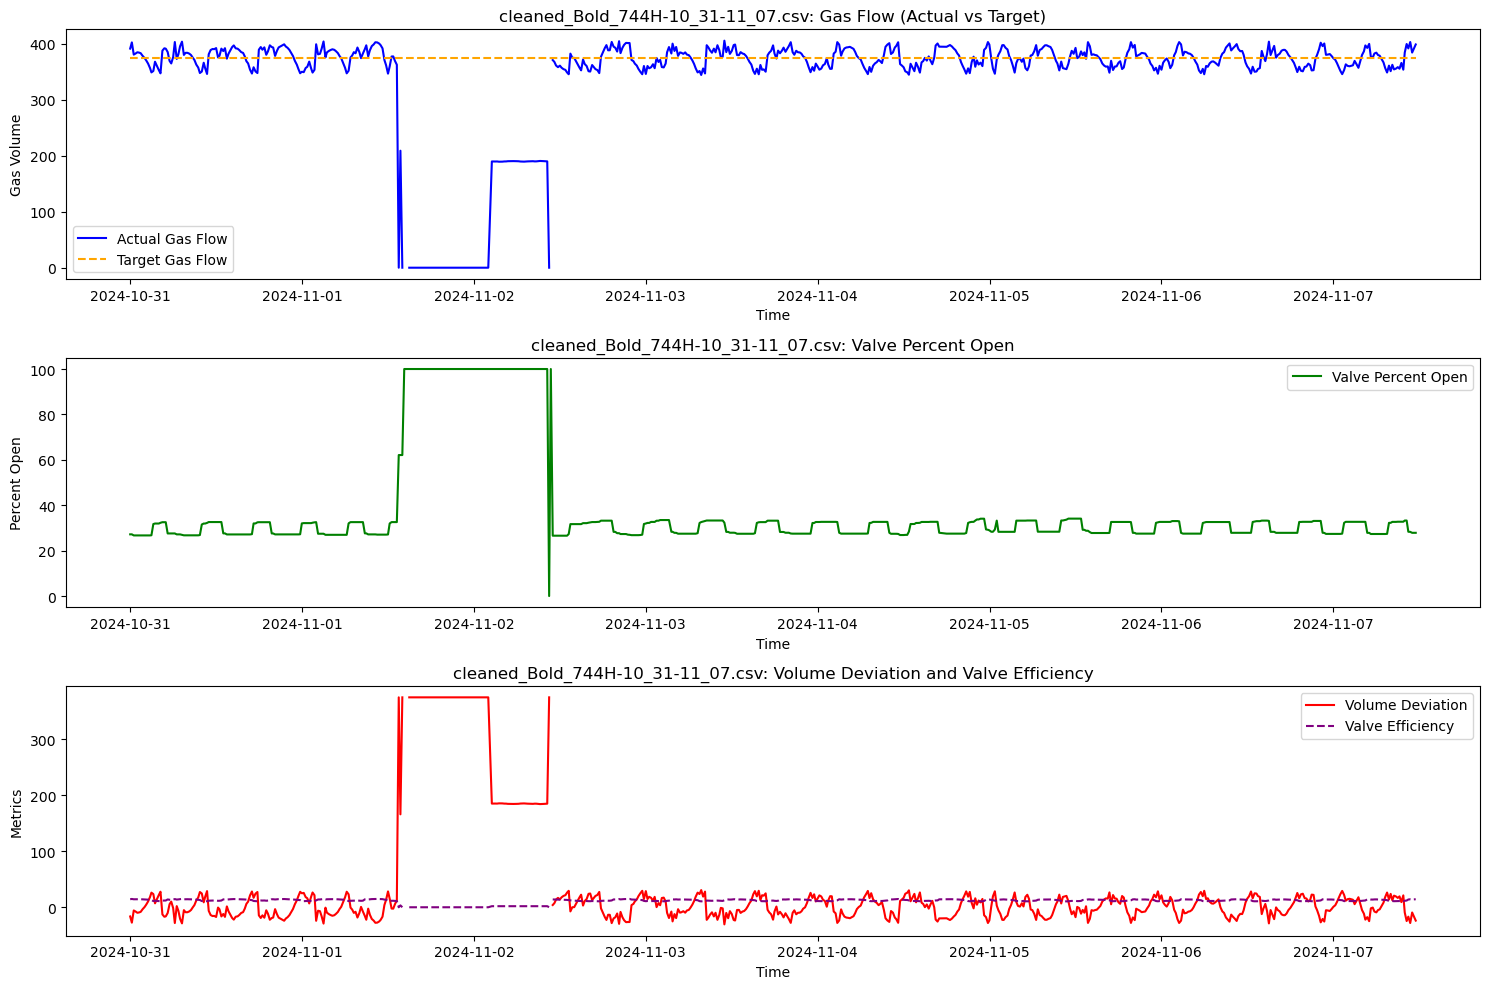

Processing file: cleaned_Fearless_709H-10_31-11_07.csv


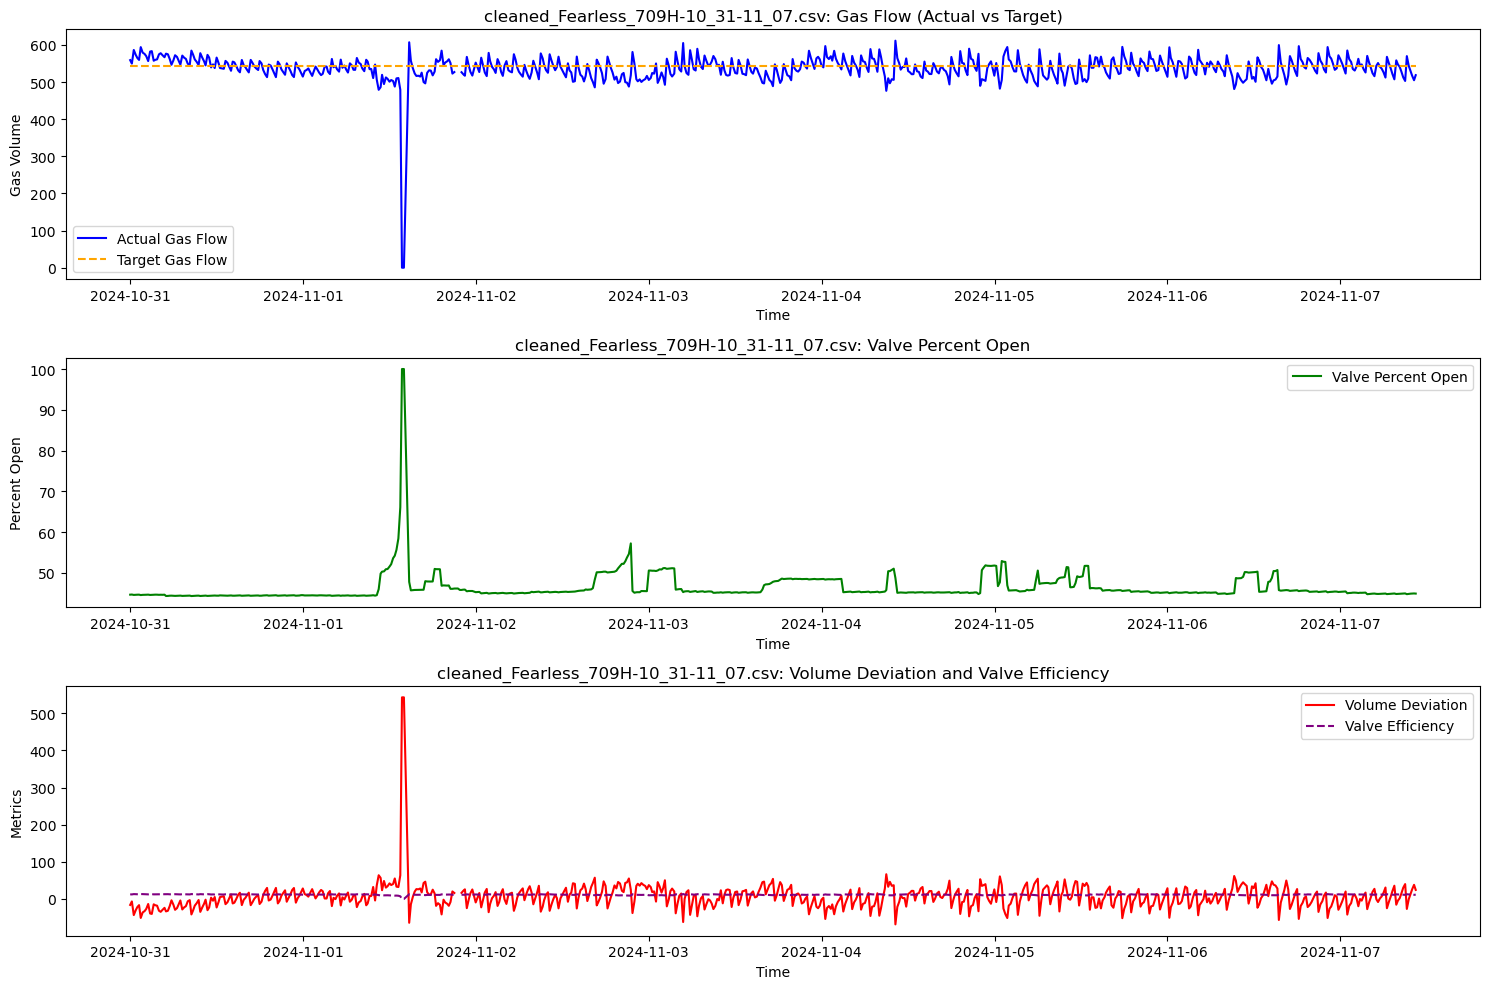

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the Downloads folder
directory_path = "data/"  # Replace with your actual Downloads folder path

# Identify cleaned CSV files in the folder
cleaned_csv_files = [f for f in os.listdir(directory_path) if f.startswith('cleaned_') and f.endswith('.csv')]

# Function to plot metrics
def plot_metrics(df, title="Dataset"):
    # Convert 'Time' column to datetime for proper plotting
    df['Time'] = pd.to_datetime(df['Time'])
    
    # Plot Time-Series Data
    plt.figure(figsize=(15, 10))

    # Subplot 1: Actual vs Target Gas Flow
    plt.subplot(3, 1, 1)
    plt.plot(df['Time'], df['Inj Gas Meter Volume Instantaneous'], label='Actual Gas Flow', color='blue')
    plt.plot(df['Time'], df['Inj Gas Meter Volume Setpoint'], label='Target Gas Flow', color='orange', linestyle='--')
    plt.title(f'{title}: Gas Flow (Actual vs Target)')
    plt.xlabel('Time')
    plt.ylabel('Gas Volume')
    plt.legend()

    # Subplot 2: Valve Percent Open
    plt.subplot(3, 1, 2)
    plt.plot(df['Time'], df['Inj Gas Valve Percent Open'], label='Valve Percent Open', color='green')
    plt.title(f'{title}: Valve Percent Open')
    plt.xlabel('Time')
    plt.ylabel('Percent Open')
    plt.legend()

    # Subplot 3: Volume Deviation and Valve Efficiency
    plt.subplot(3, 1, 3)
    plt.plot(df['Time'], df['Volume Deviation'], label='Volume Deviation', color='red')
    plt.plot(df['Time'], df['Valve Efficiency'], label='Valve Efficiency', color='purple', linestyle='--')
    plt.title(f'{title}: Volume Deviation and Valve Efficiency')
    plt.xlabel('Time')
    plt.ylabel('Metrics')
    plt.legend()

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Loop through each cleaned file and visualize
for csv_file in cleaned_csv_files:
    file_path = os.path.join(directory_path, csv_file)
    print(f"Processing file: {csv_file}")
    
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Plot the metrics for the dataset
    plot_metrics(df, title=csv_file)


In [4]:
df.head()

Time  Inj Gas Meter Volume Instantaneous  \
0 2024-10-31 00:00:00                           559.02255   
1 2024-10-31 00:14:00                           549.63090   
2 2024-10-31 00:30:00                           586.35675   
3 2024-10-31 00:46:00                           573.30135   
4 2024-10-31 01:00:00                           564.64830   

   Inj Gas Meter Volume Setpoint  Inj Gas Valve Percent Open  \
0                          543.0                    44.65046   
1                          543.0                    44.68318   
2                          543.0                    44.58979   
3                          543.0                    44.62712   
4                          543.0                    44.64499   

   Volume Deviation  Valve Efficiency  
0         -16.02255         12.519970  
1          -6.63090         12.300619  
2         -43.35675         13.150020  
3         -30.30135         12.846476  
4         -21.64830         12.647515

In [5]:
import os
import pandas as pd

# Path to the Downloads folder
directory_path = "/Users/saicharanmerugu/Downloads/"  # Replace with your actual Downloads folder path

# Identify cleaned CSV files in the folder
cleaned_csv_files = [f for f in os.listdir(directory_path) if f.startswith('cleaned_') and f.endswith('.csv')]

# Function to check for null values in all files
def check_null_values(directory, files):
    null_summary = {}
    for csv_file in files:
        file_path = os.path.join(directory, csv_file)
        df = pd.read_csv(file_path)
        null_counts = df.isnull().sum()
        null_summary[csv_file] = null_counts
    return pd.DataFrame(null_summary)

# Check null values for all cleaned files
null_values_summary = check_null_values(directory_path, cleaned_csv_files)

# Print the null values summary
print("Null Values Summary:")
print(null_values_summary)


Null Values Summary:
                                    cleaned_cleaned_cleaned_Steadfast_505H-10_30-11_07.csv  \
Hydrate_Predicted                                                                 NaN        
Inj Gas Meter Volume Instantaneous                                                8.0        
Inj Gas Meter Volume Setpoint                                                    11.0        
Inj Gas Valve Percent Open                                                        2.0        
Time                                                                              0.0        
Valve Efficiency                                                                 10.0        
Volume Deviation                                                                 19.0        

                                    cleaned_cleaned_cleaned_cleaned_Resolute_728H-10_14-10_21.csv  \
Hydrate_Predicted                                                                 NaN               
Inj Gas Meter Volume Ins

In [6]:
# Function to handle null values comprehensively without warnings
def fully_resolve_nulls(df):
    # Interpolate to handle internal missing values
    df['Inj Gas Meter Volume Instantaneous'] = df['Inj Gas Meter Volume Instantaneous'].interpolate(method='linear')
    df['Inj Gas Meter Volume Setpoint'] = df['Inj Gas Meter Volume Setpoint'].interpolate(method='linear')
    df['Inj Gas Valve Percent Open'] = df['Inj Gas Valve Percent Open'].interpolate(method='linear')
    
    # Forward-fill and backward-fill to handle edge cases
    df['Inj Gas Meter Volume Instantaneous'] = df['Inj Gas Meter Volume Instantaneous'].ffill().bfill()
    df['Inj Gas Meter Volume Setpoint'] = df['Inj Gas Meter Volume Setpoint'].ffill().bfill()
    df['Inj Gas Valve Percent Open'] = df['Inj Gas Valve Percent Open'].ffill().bfill()
    
    # Recalculate derived features
    df['Volume Deviation'] = df['Inj Gas Meter Volume Setpoint'] - df['Inj Gas Meter Volume Instantaneous']
    epsilon = 1e-5
    df['Valve Efficiency'] = df['Inj Gas Meter Volume Instantaneous'] / (df['Inj Gas Valve Percent Open'] + epsilon)
    
    # Drop rows with any remaining nulls as a final step
    df = df.dropna()
    return df

# Apply comprehensive null resolution to all cleaned datasets
final_cleaned_dataframes = {}
for csv_file in cleaned_csv_files:
    file_path = os.path.join(directory_path, csv_file)
    df = pd.read_csv(file_path)
    cleaned_df = fully_resolve_nulls(df)
    final_cleaned_dataframes[csv_file] = cleaned_df

# Check for null values to ensure all datasets are clean
final_null_summary = {filename: df.isnull().sum() for filename, df in final_cleaned_dataframes.items()}

# Print the final null values summary
print("Final Null Values Summary After Comprehensive Handling:")
print(pd.DataFrame(final_null_summary))


Final Null Values Summary After Comprehensive Handling:
                                    cleaned_cleaned_cleaned_Steadfast_505H-10_30-11_07.csv  \
Hydrate_Predicted                                                                 NaN        
Inj Gas Meter Volume Instantaneous                                                0.0        
Inj Gas Meter Volume Setpoint                                                     0.0        
Inj Gas Valve Percent Open                                                        0.0        
Time                                                                              0.0        
Valve Efficiency                                                                  0.0        
Volume Deviation                                                                  0.0        

                                    cleaned_cleaned_cleaned_cleaned_Resolute_728H-10_14-10_21.csv  \
Hydrate_Predicted                                                                 NaN     

Visualizing: cleaned_cleaned_cleaned_Steadfast_505H-10_30-11_07.csv


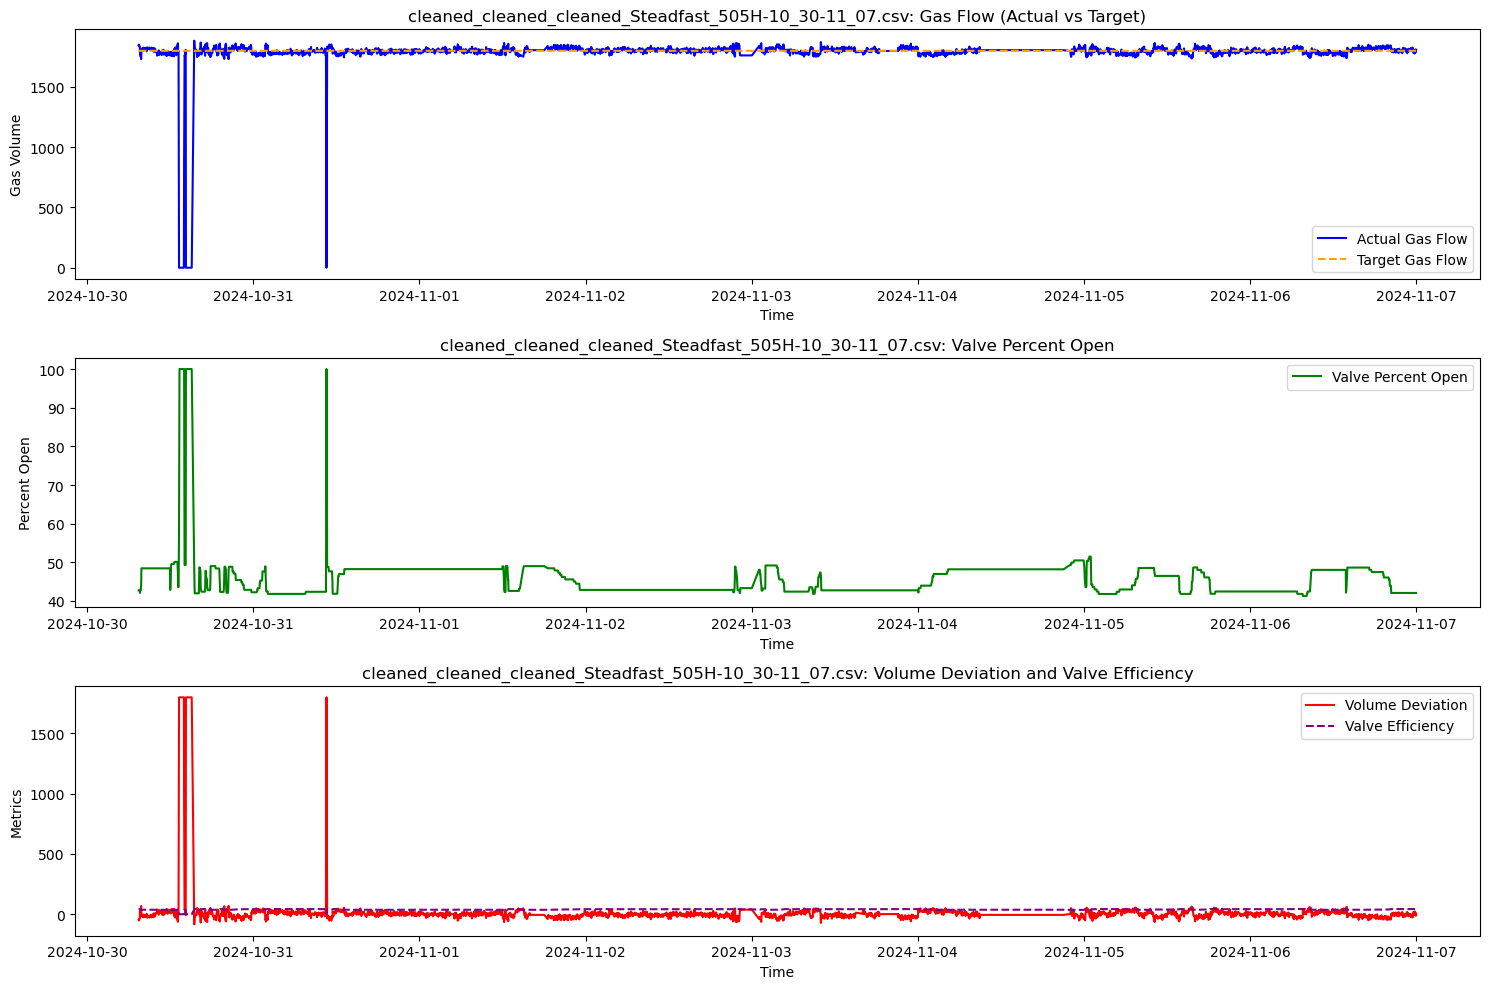

Visualizing: cleaned_cleaned_cleaned_cleaned_Resolute_728H-10_14-10_21.csv


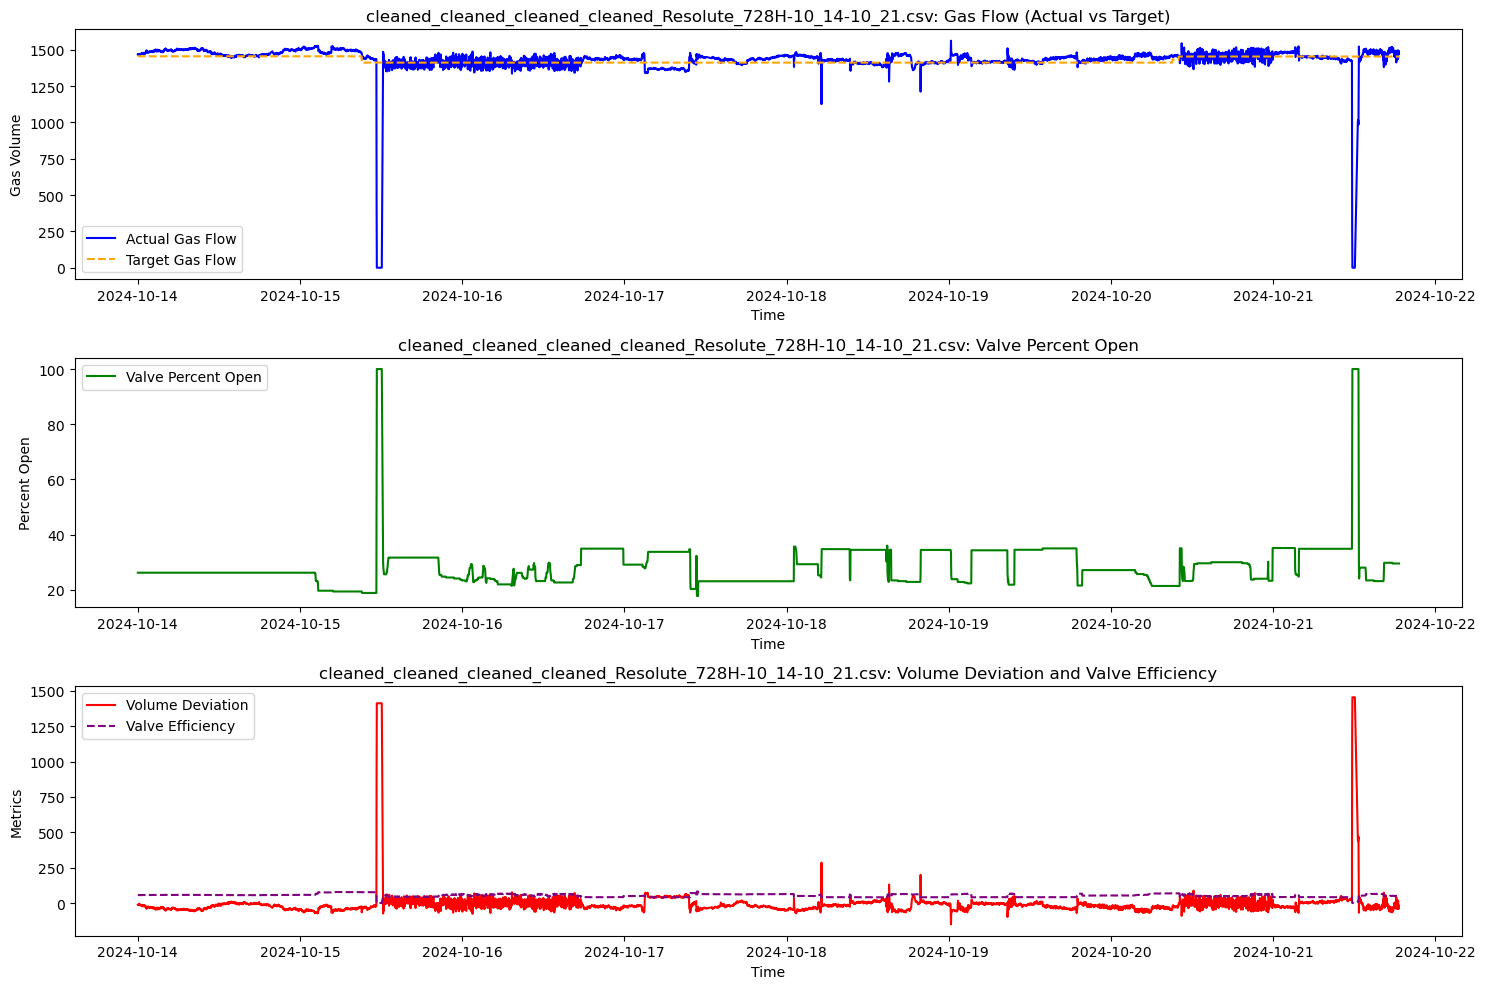

Visualizing: cleaned_cleaned_cleaned_Courageous_729H-09_25-09_28.csv


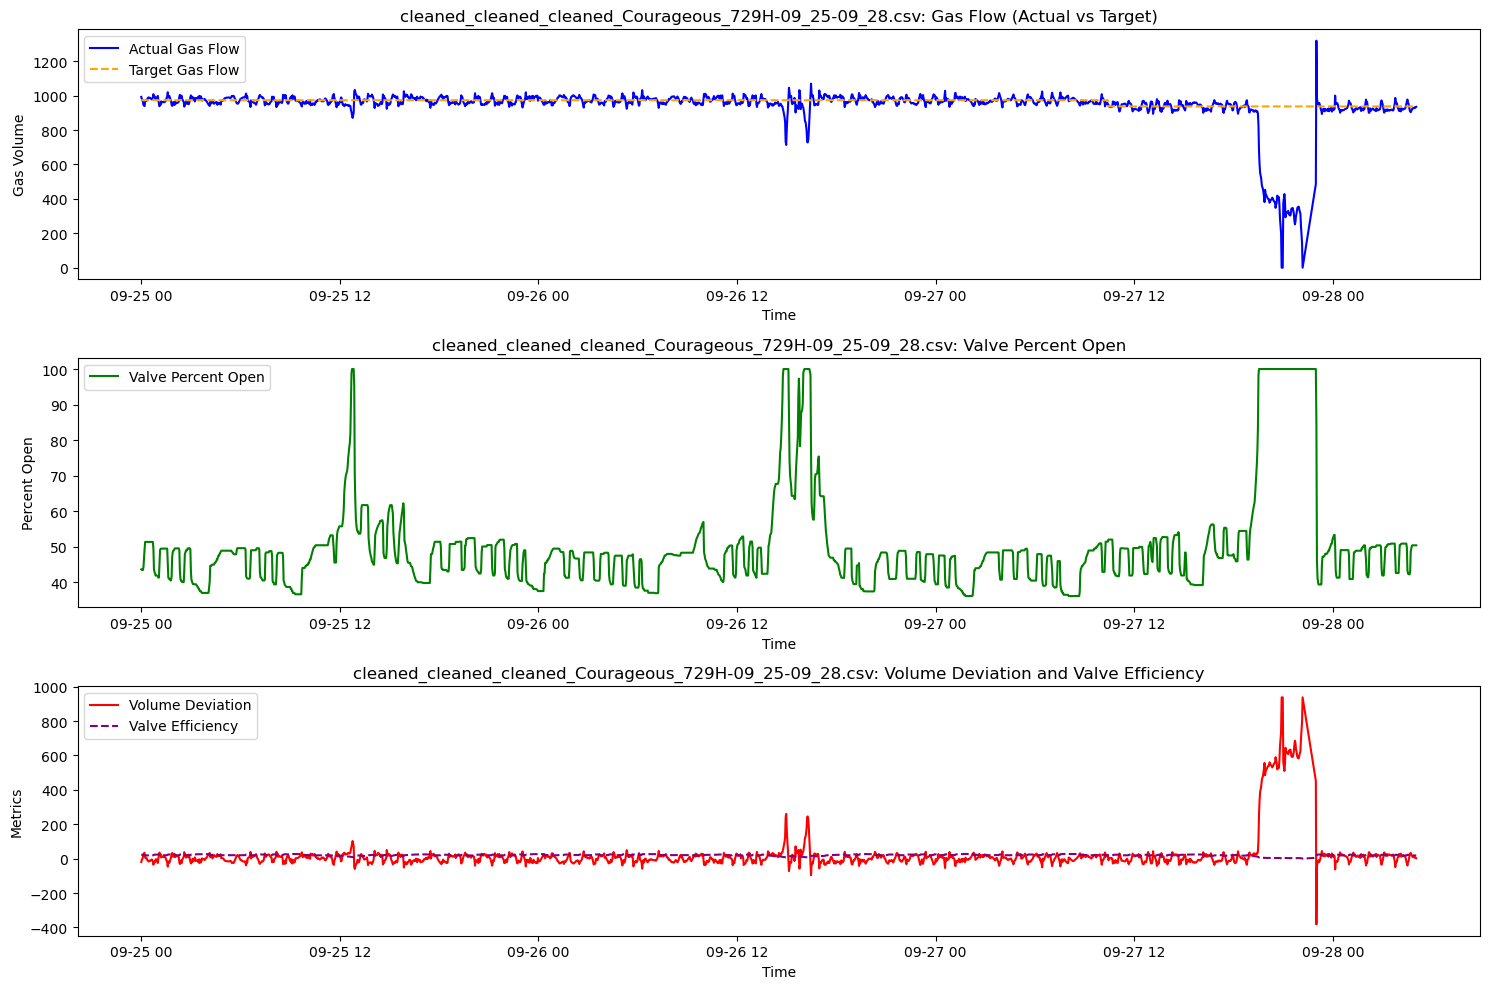

Visualizing: cleaned_cleaned_Valiant_505H-09_22-09_30.csv


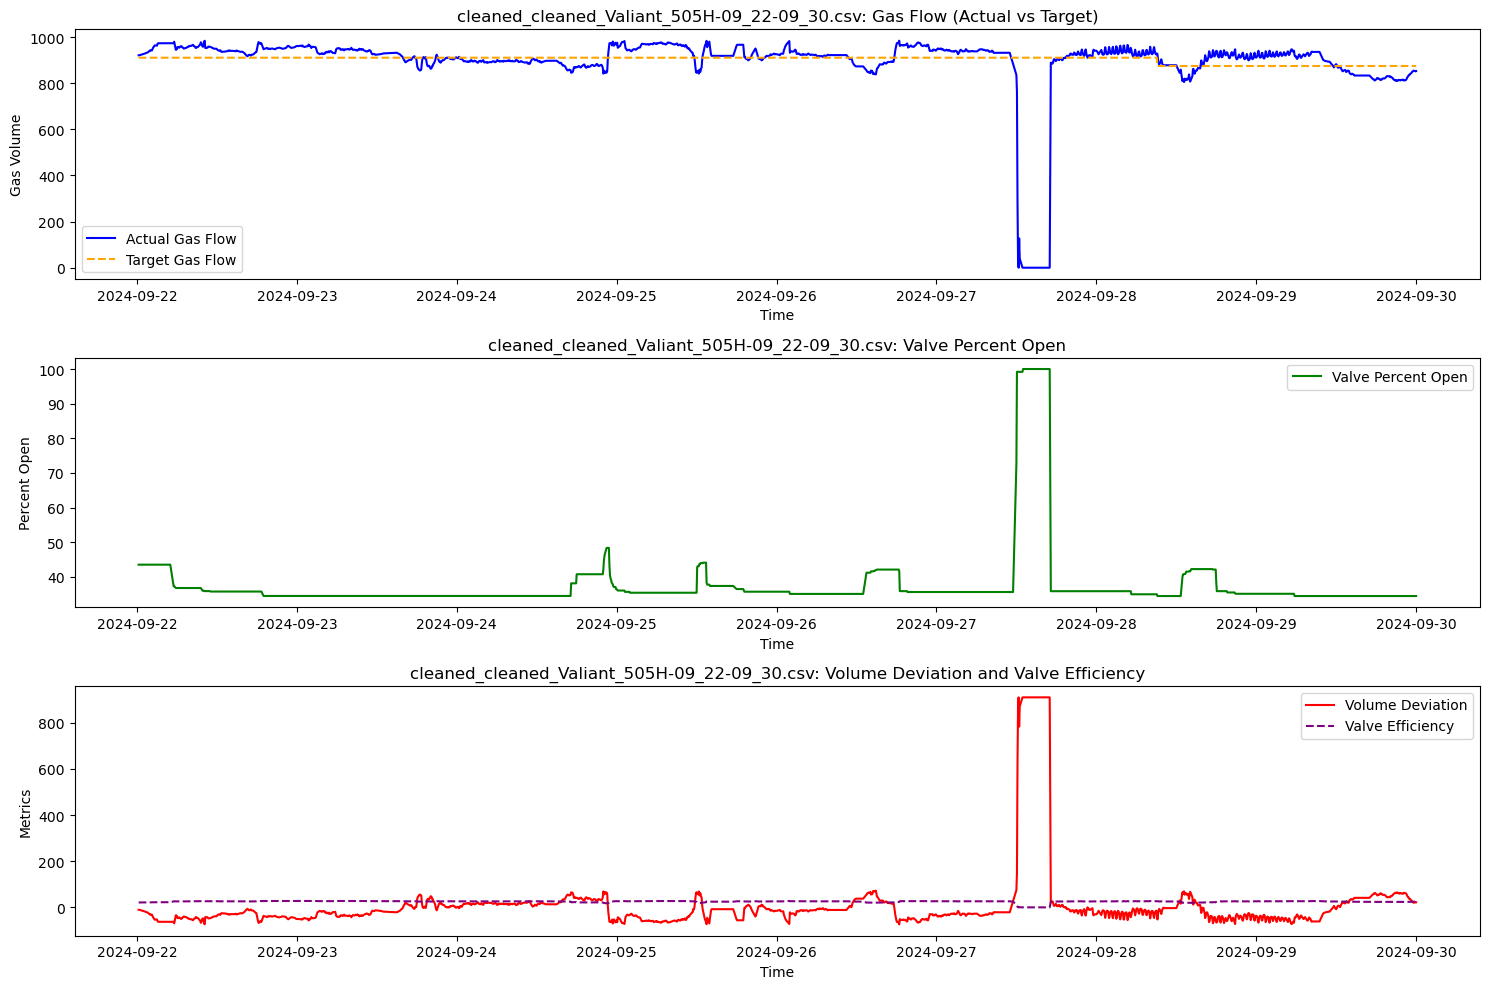

Visualizing: cleaned_cleaned_cleaned_cleaned_Bold_744H-10_31-11_07.csv


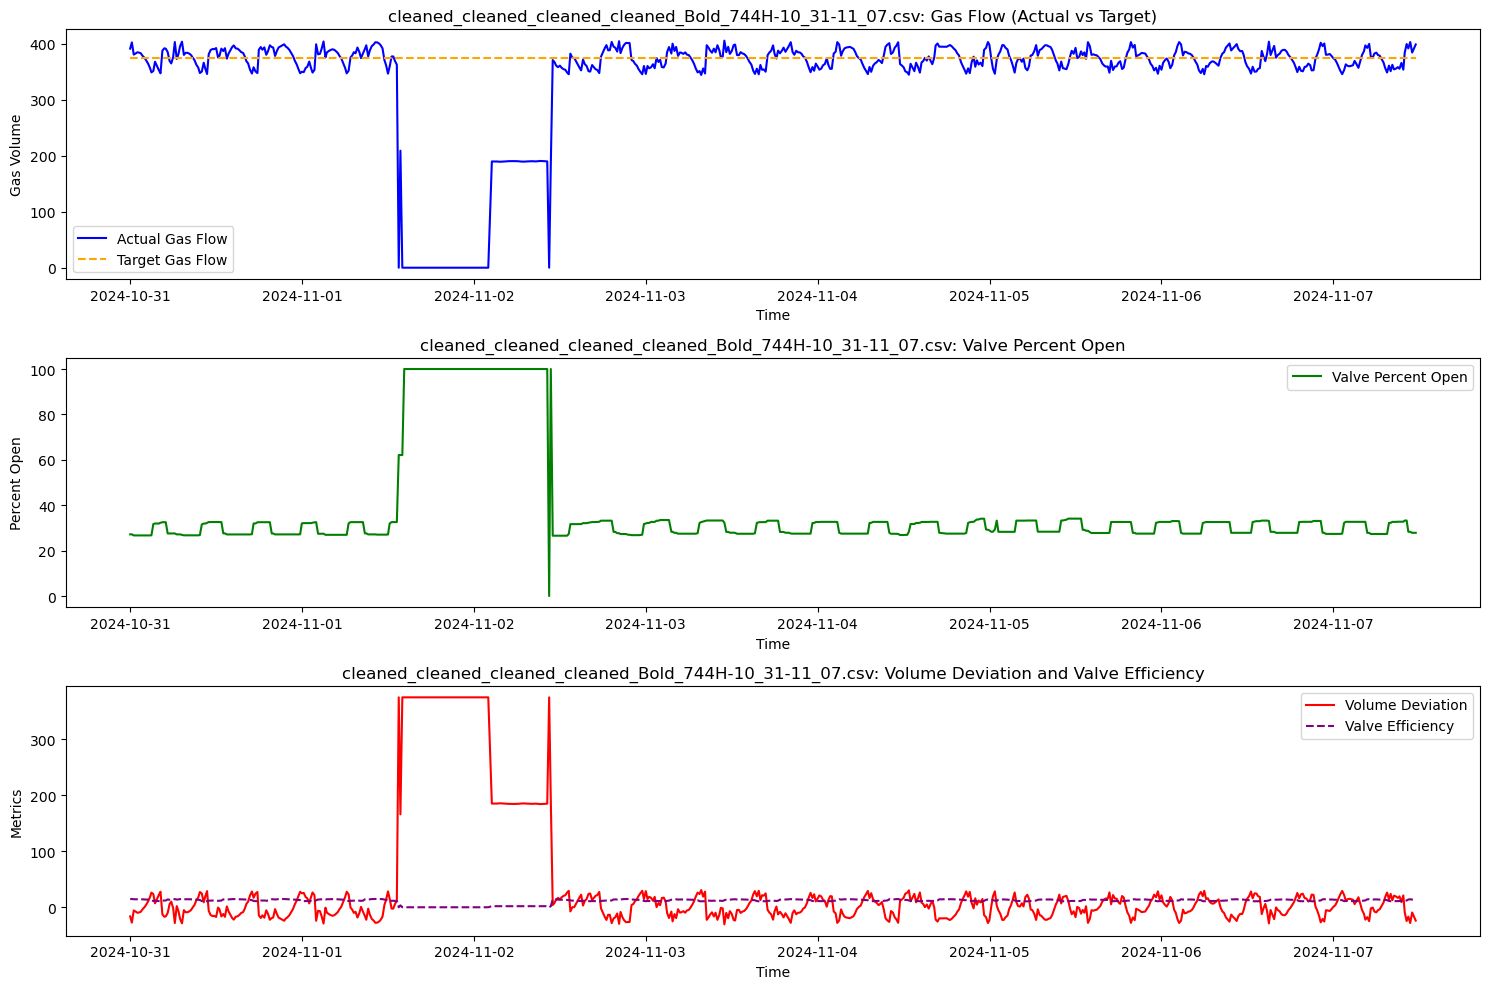

Visualizing: cleaned_cleaned_cleaned_Ruthless_745H-10_01-10_08.csv


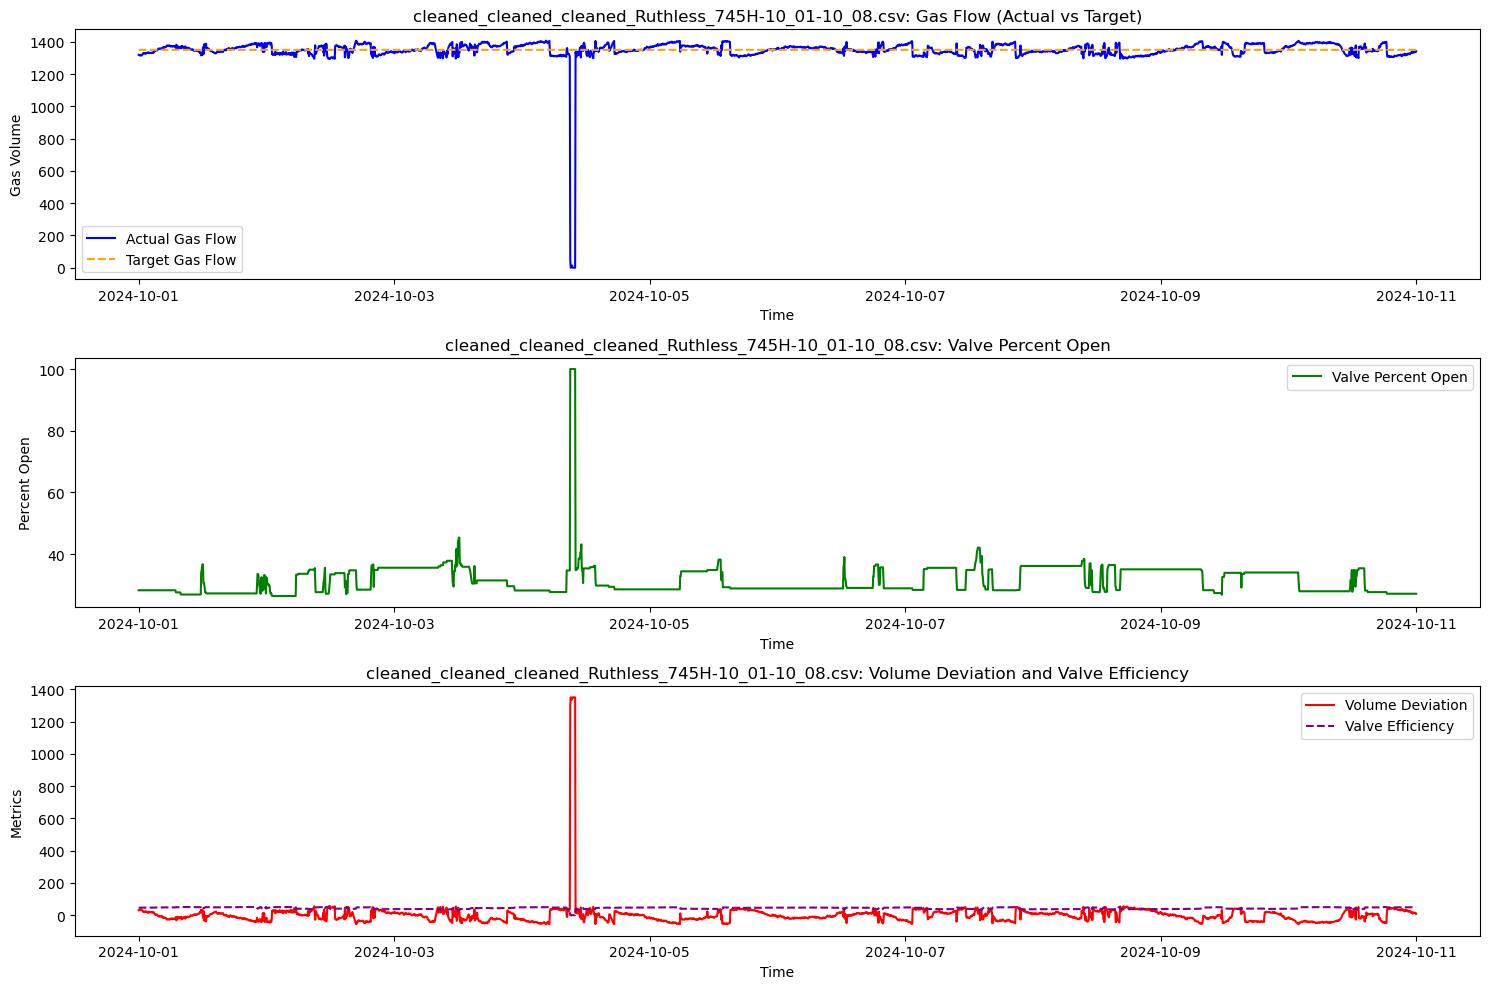

Visualizing: cleaned_cleaned_Fearless_709H-10_31-11_07.csv


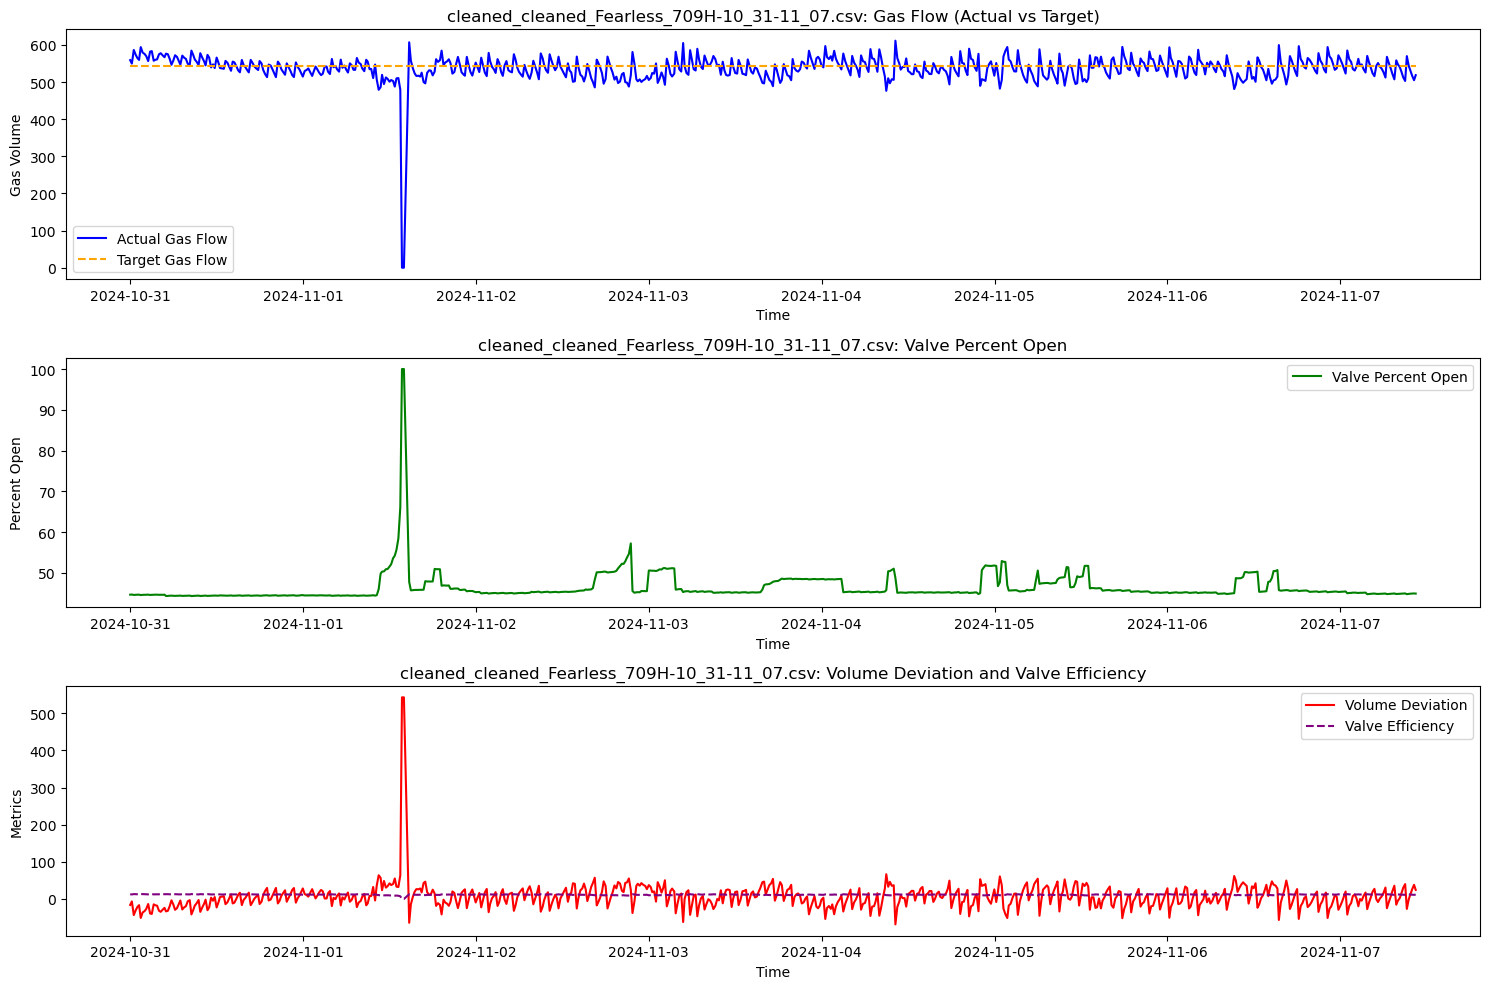

Visualizing: cleaned_Noble_4H-10_24-10_29.csv


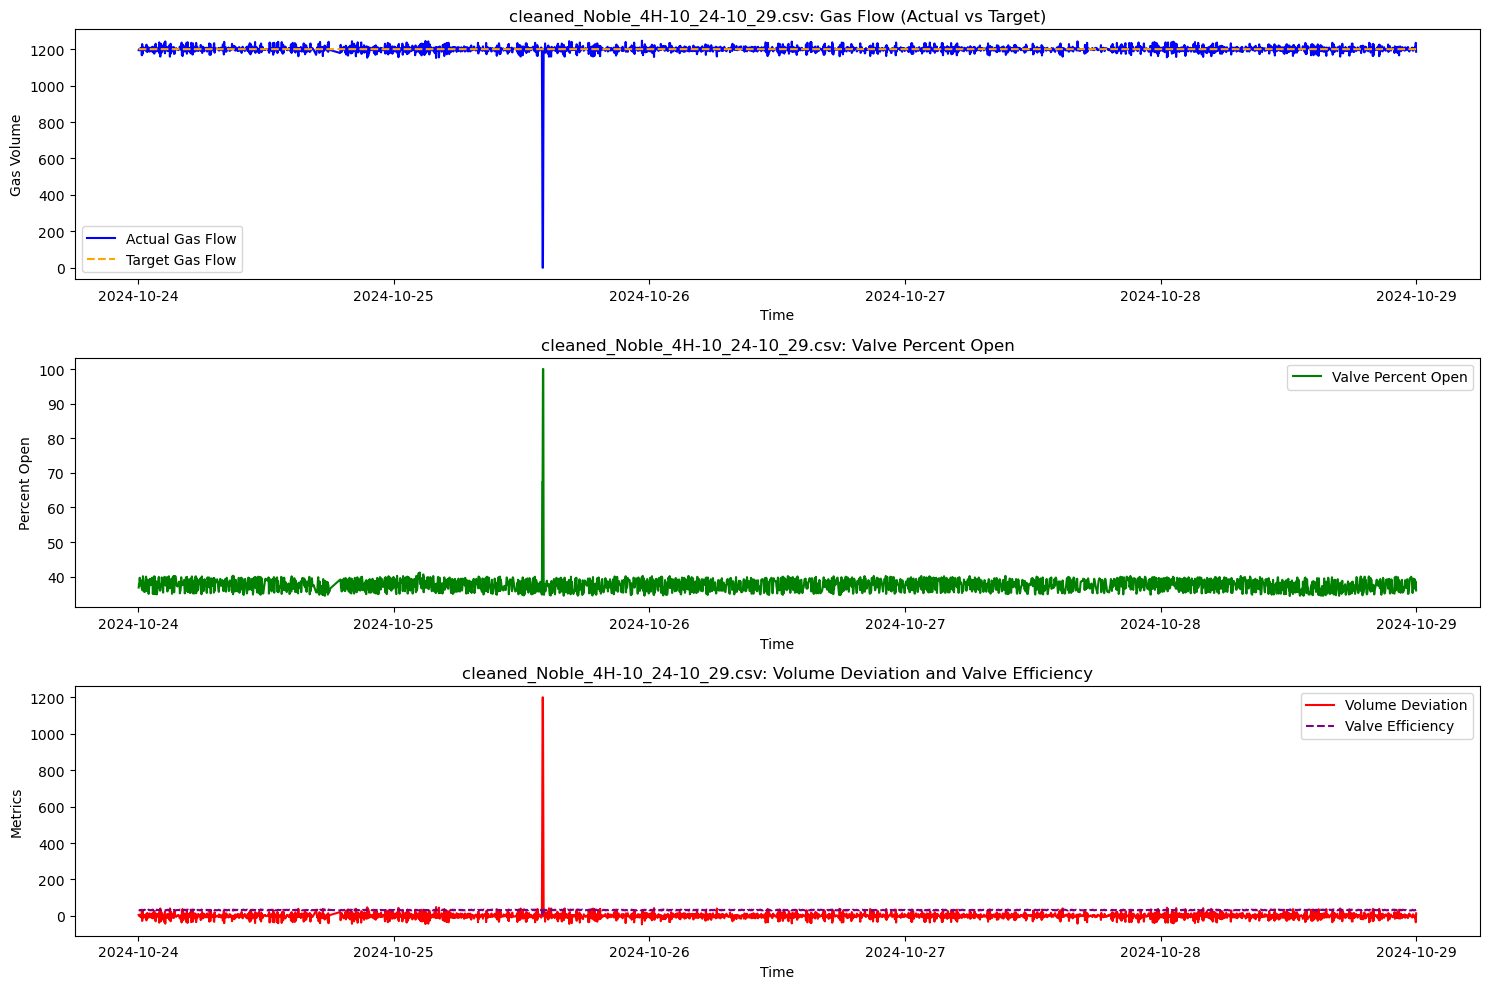

Visualizing: cleaned_cleaned_Bold_744H-10_31-11_07.csv


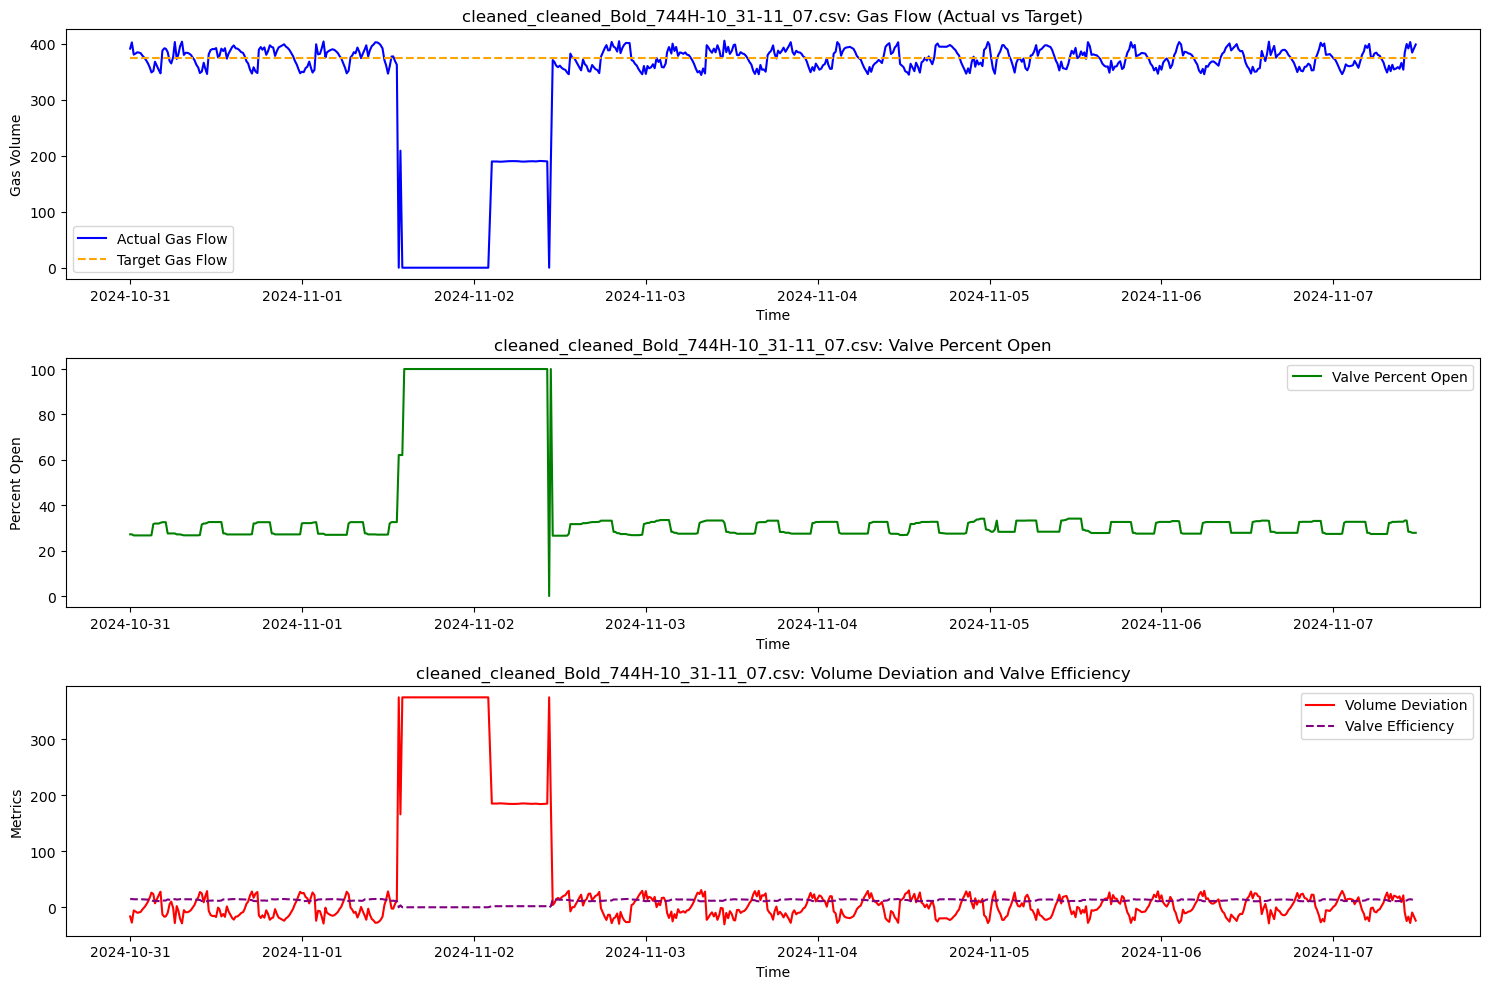

Visualizing: cleaned_copy.csv


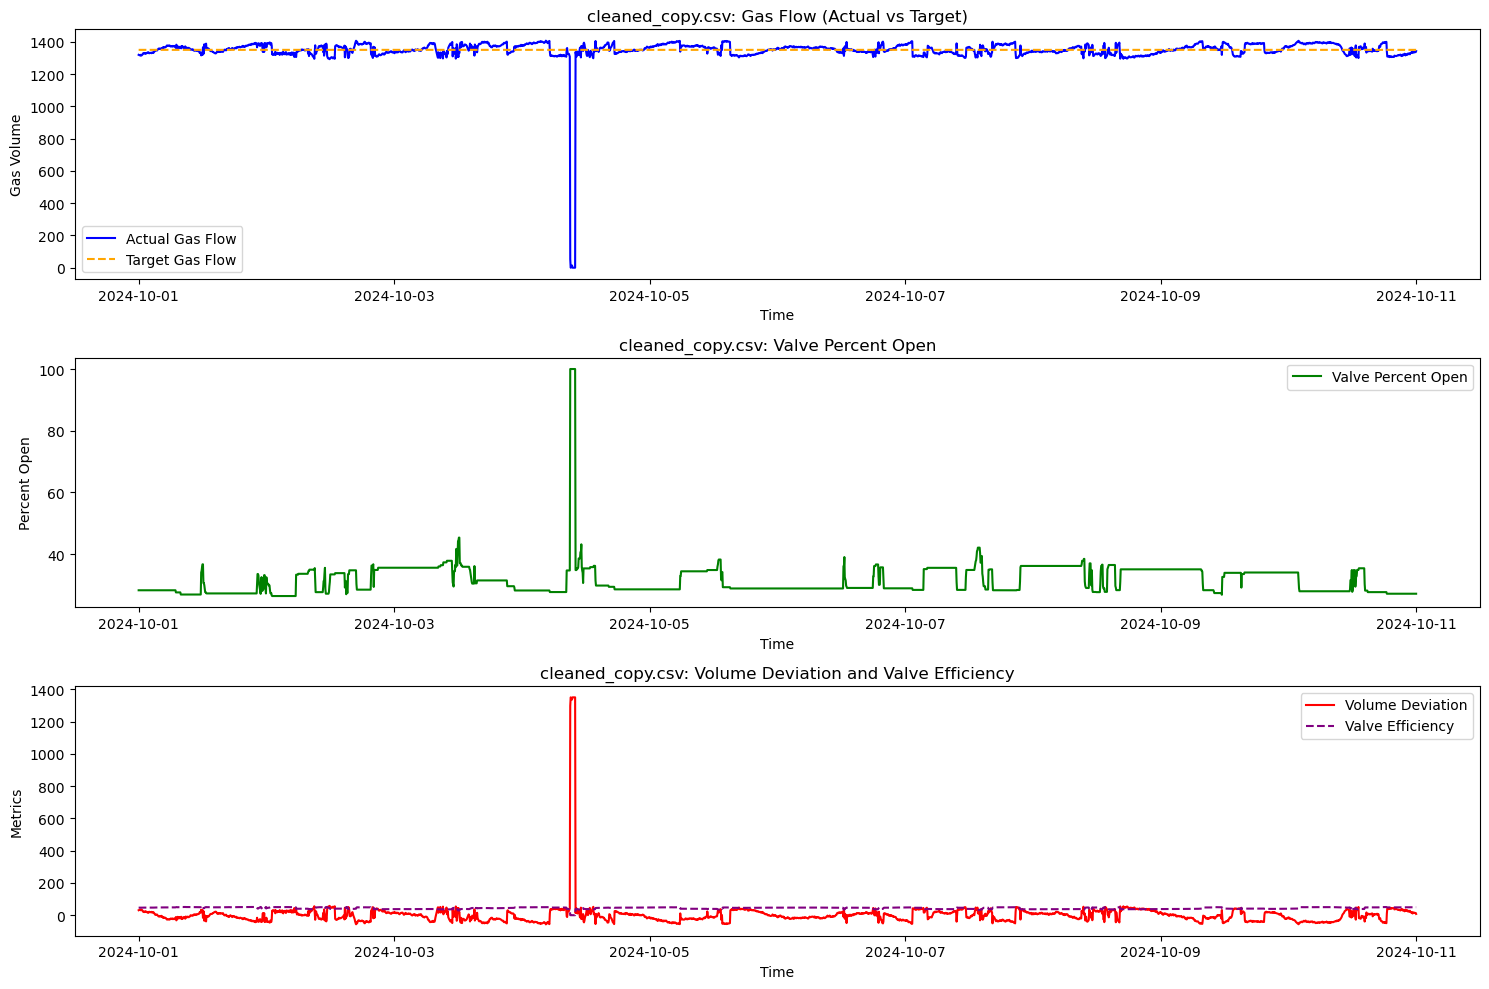

Visualizing: cleaned_cleaned_cleaned_cleaned_cleaned_Steadfast_505H-10_30-11_07.csv


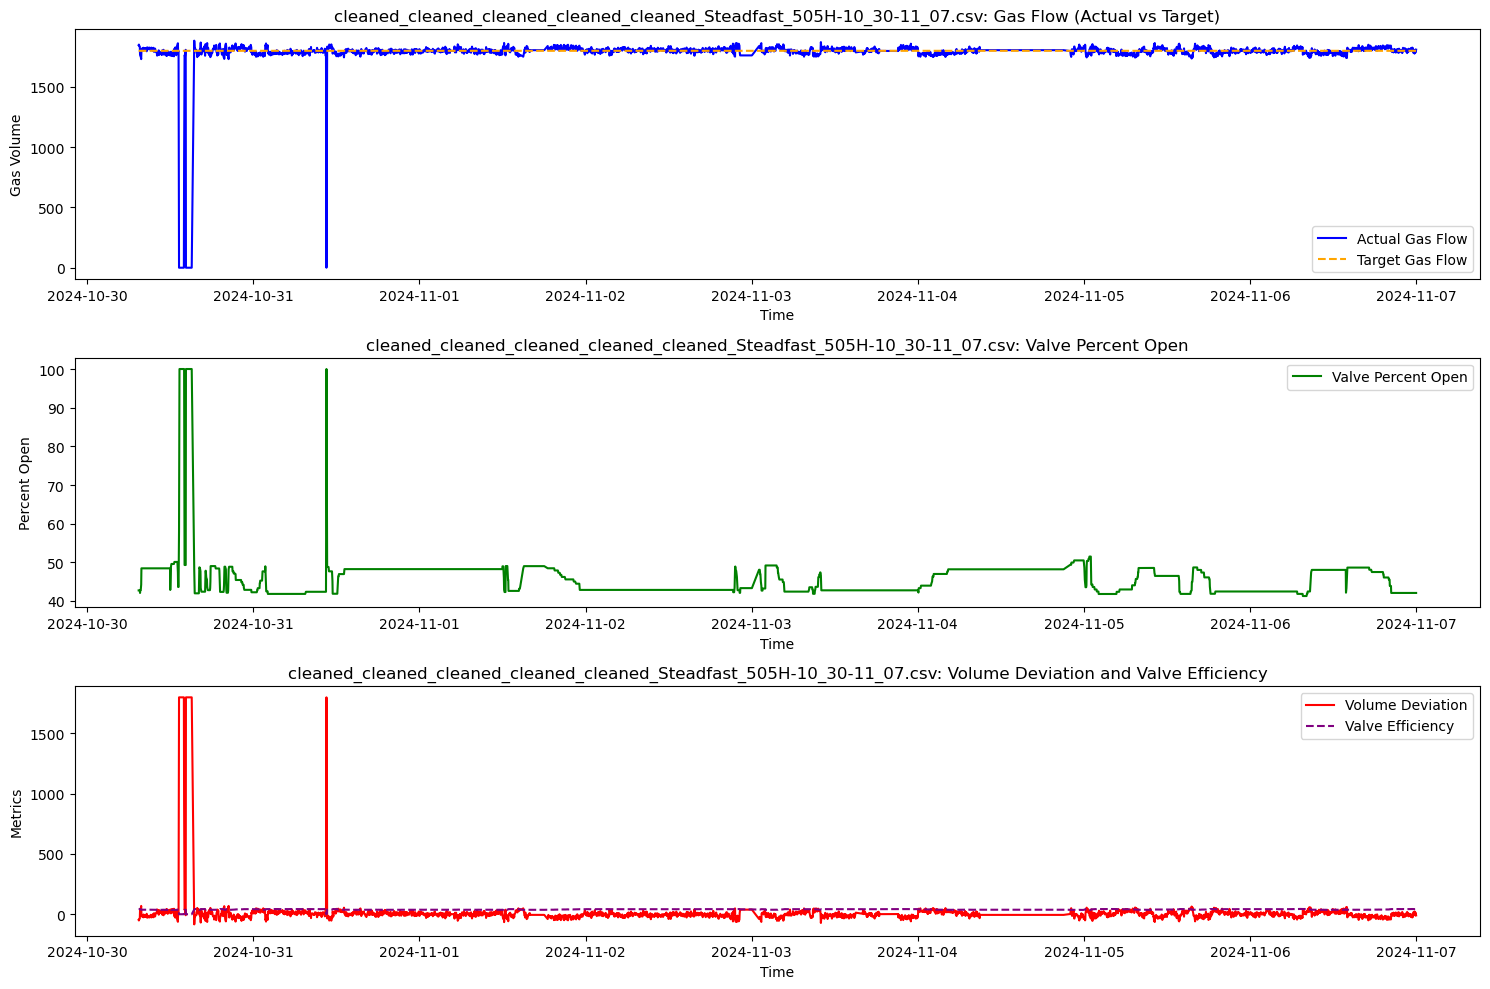

Visualizing: cleaned_Valiant_505H-09_22-09_30.csv


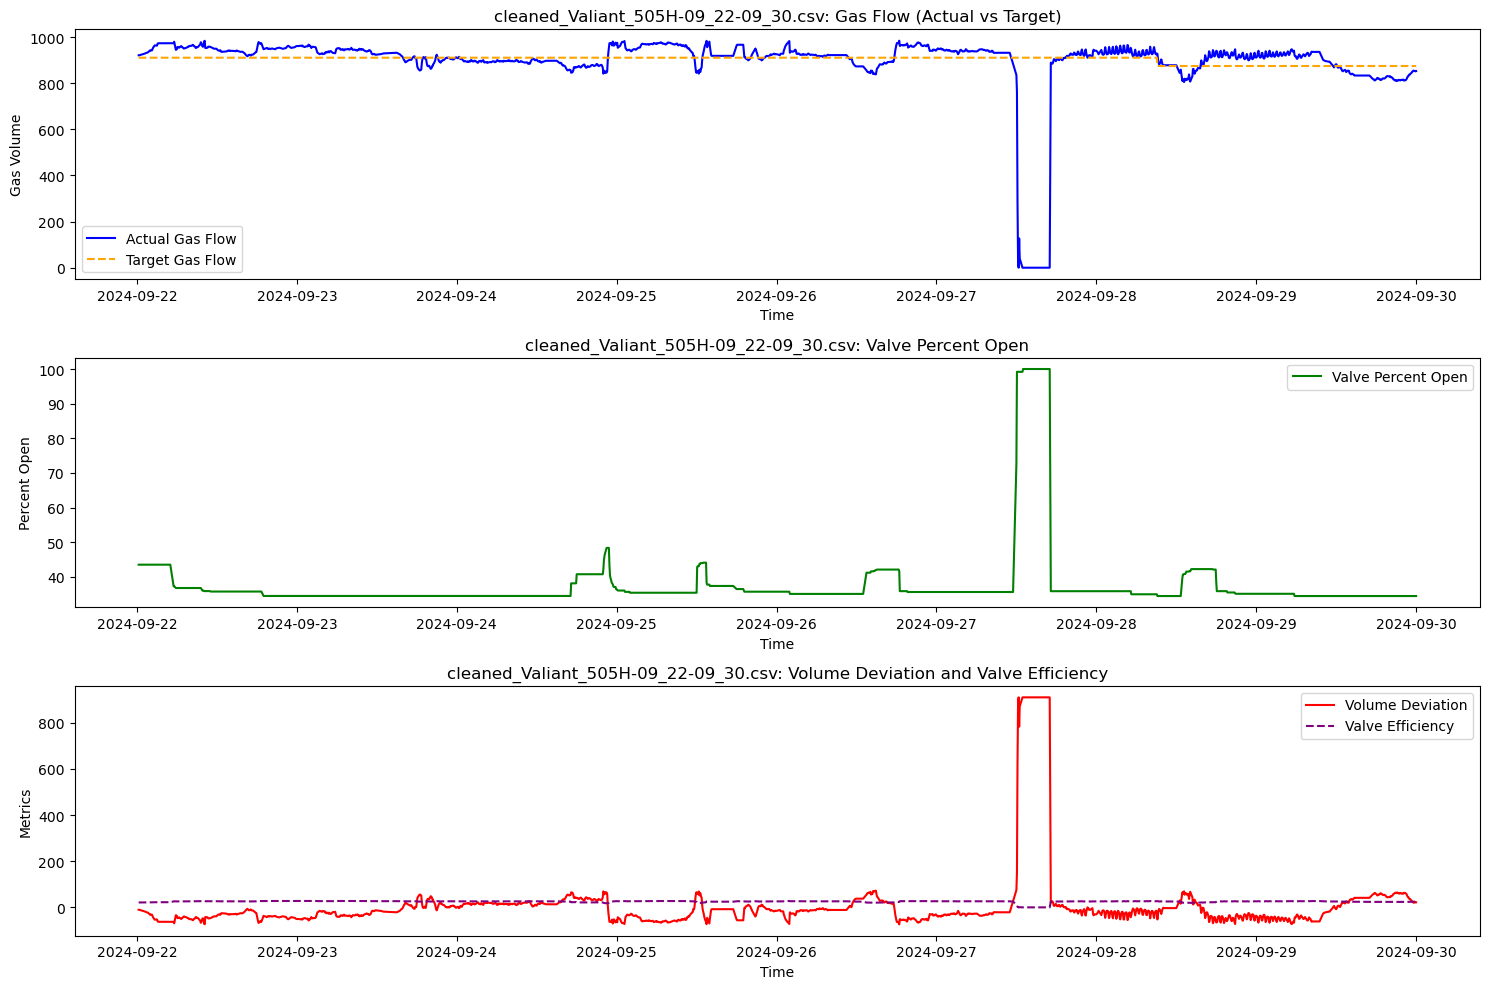

Visualizing: cleaned_hydration_events.csv


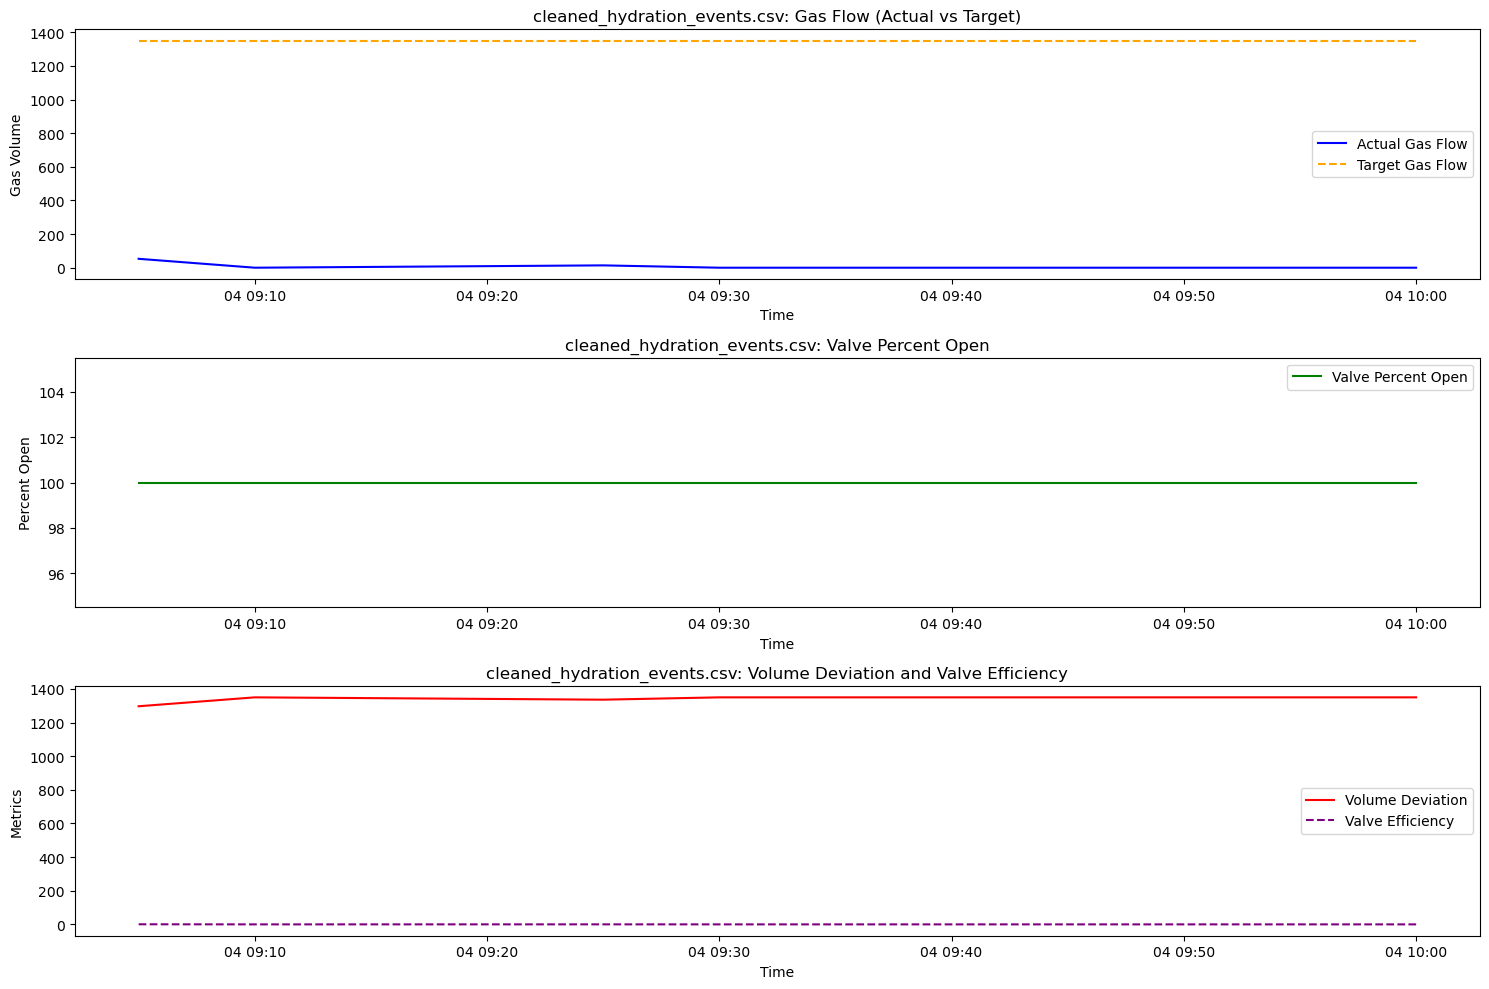

Visualizing: cleaned_cleaned_cleaned_cleaned_cleaned_Ruthless_745H-10_01-10_08.csv


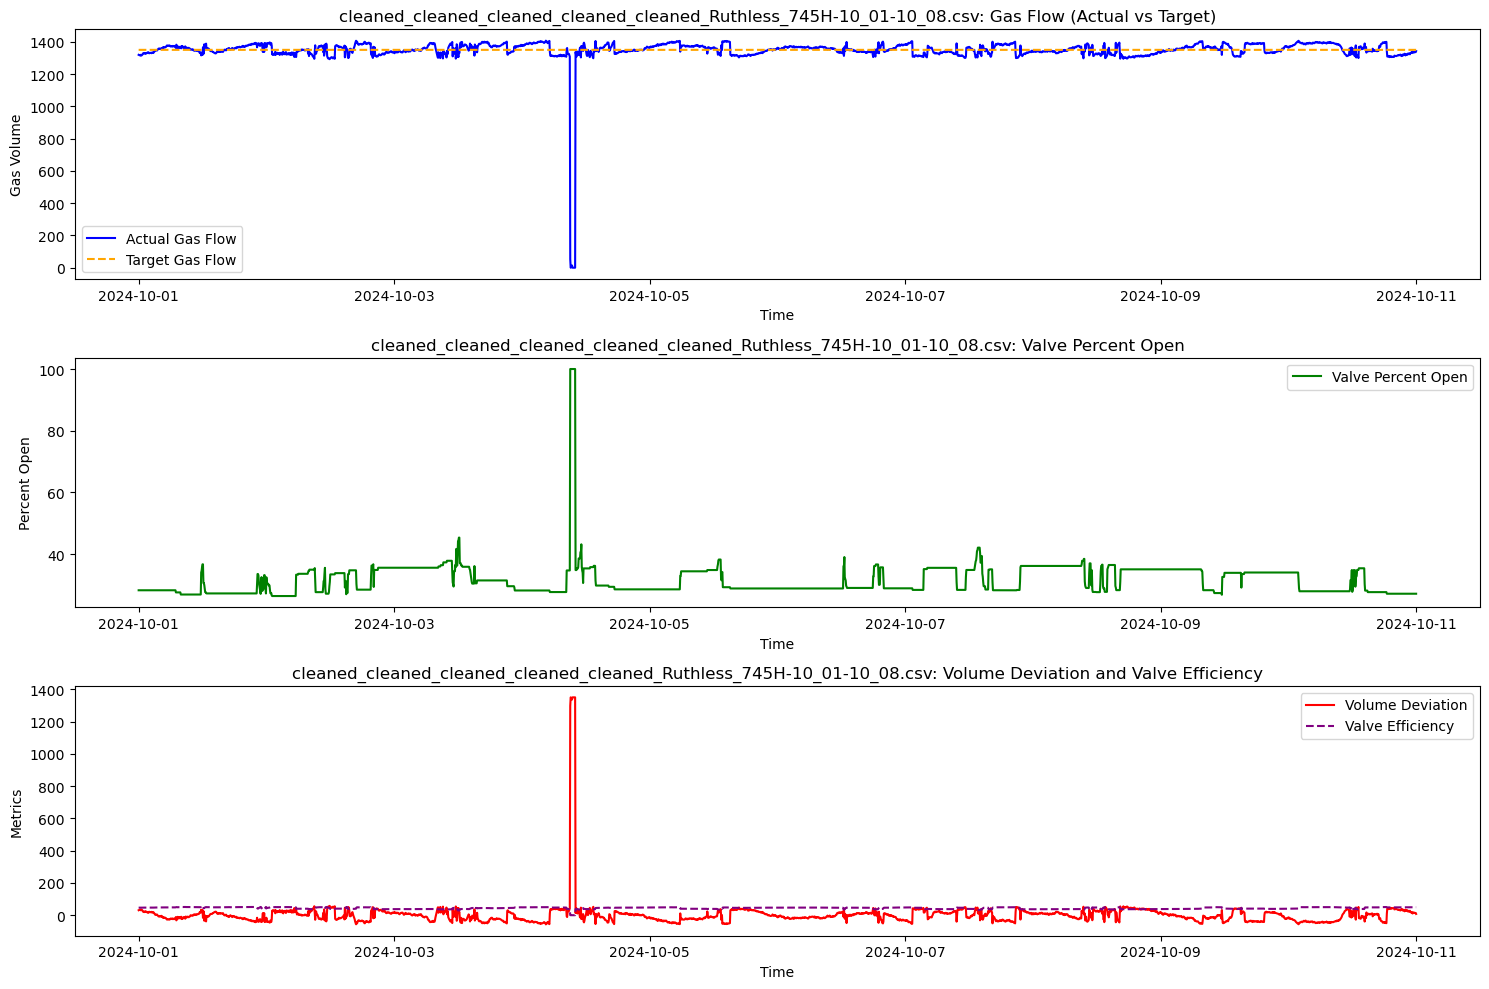

Visualizing: cleaned_cleaned_Resolute_728H-10_14-10_21.csv


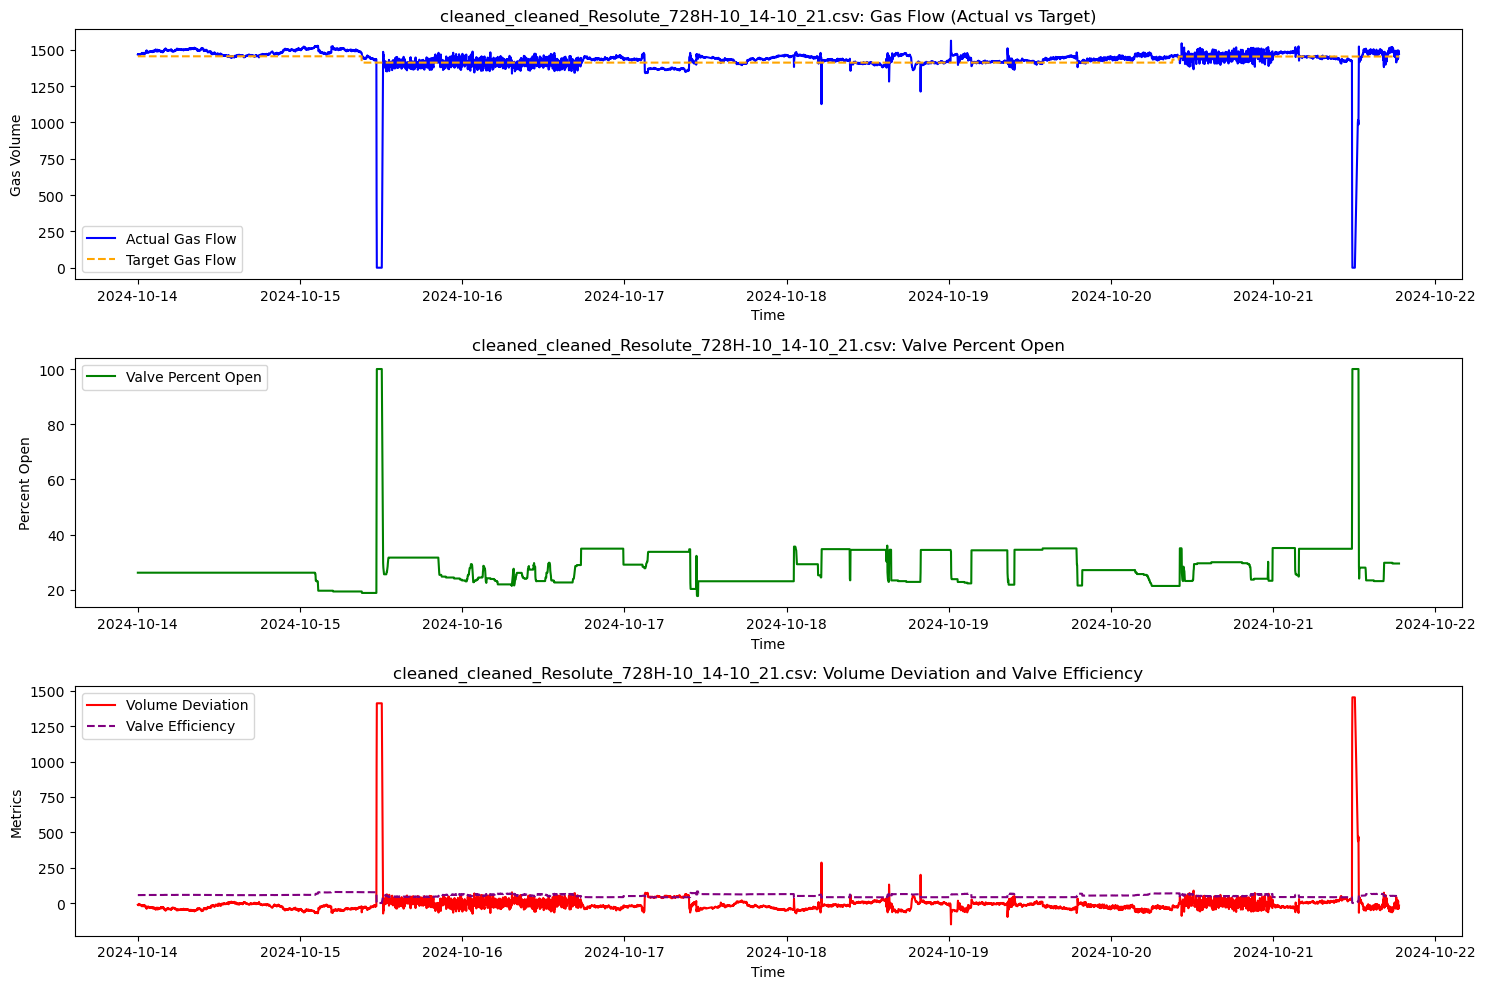

Visualizing: cleaned_cleaned_cleaned_cleaned_cleaned_Noble_4H-10_24-10_29.csv


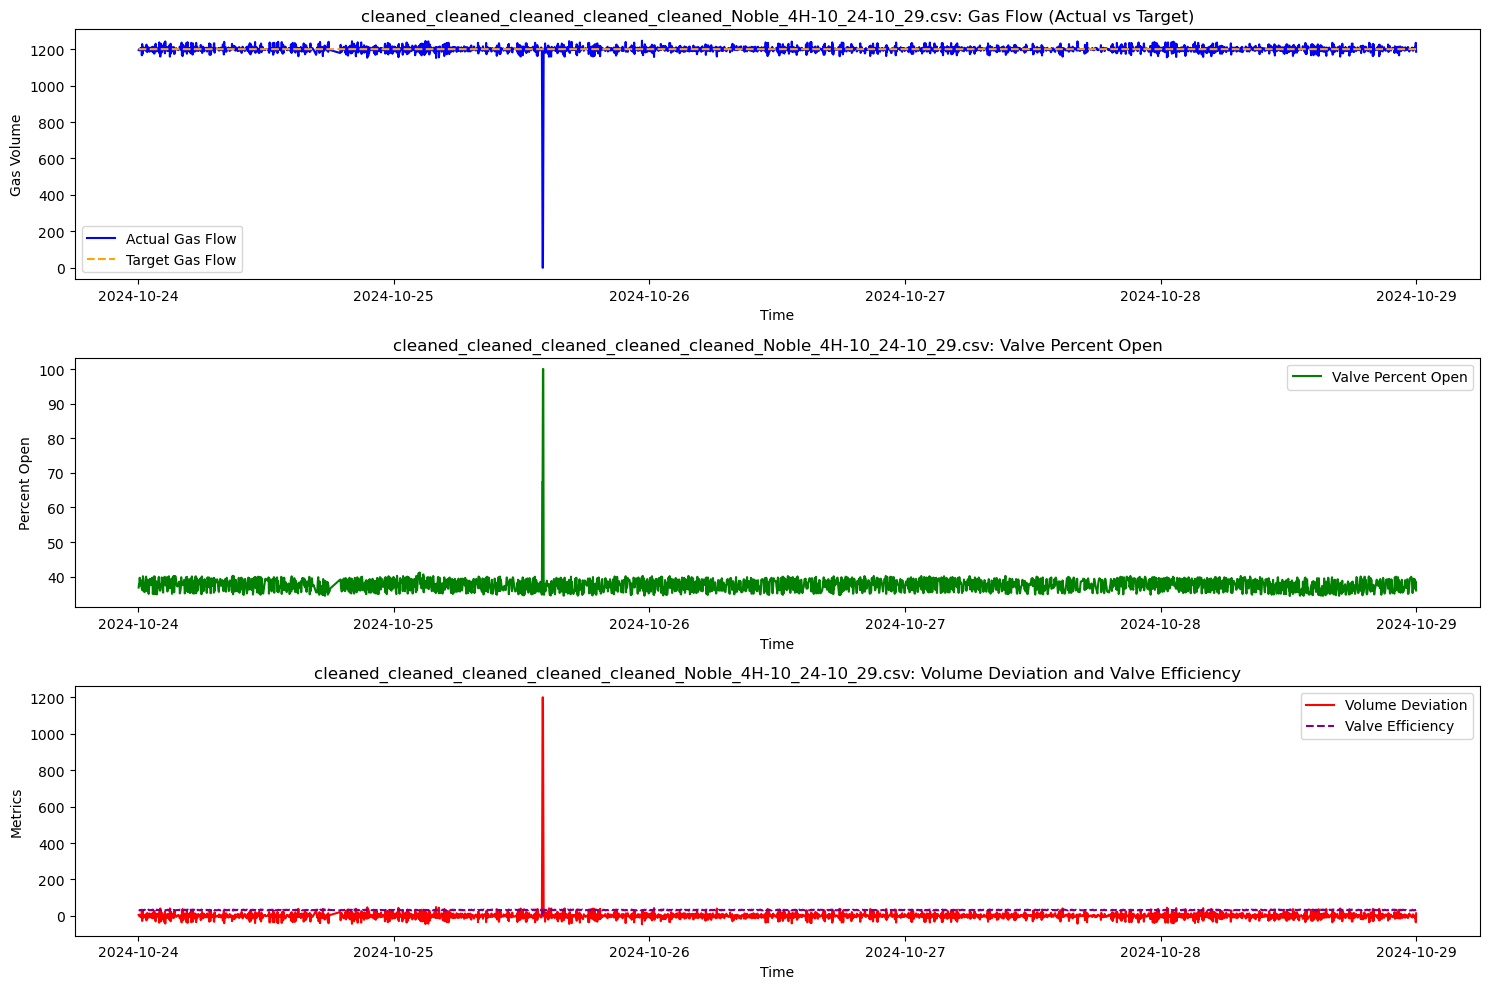

Visualizing: cleaned_cleaned_cleaned_cleaned_Steadfast_505H-10_30-11_07.csv


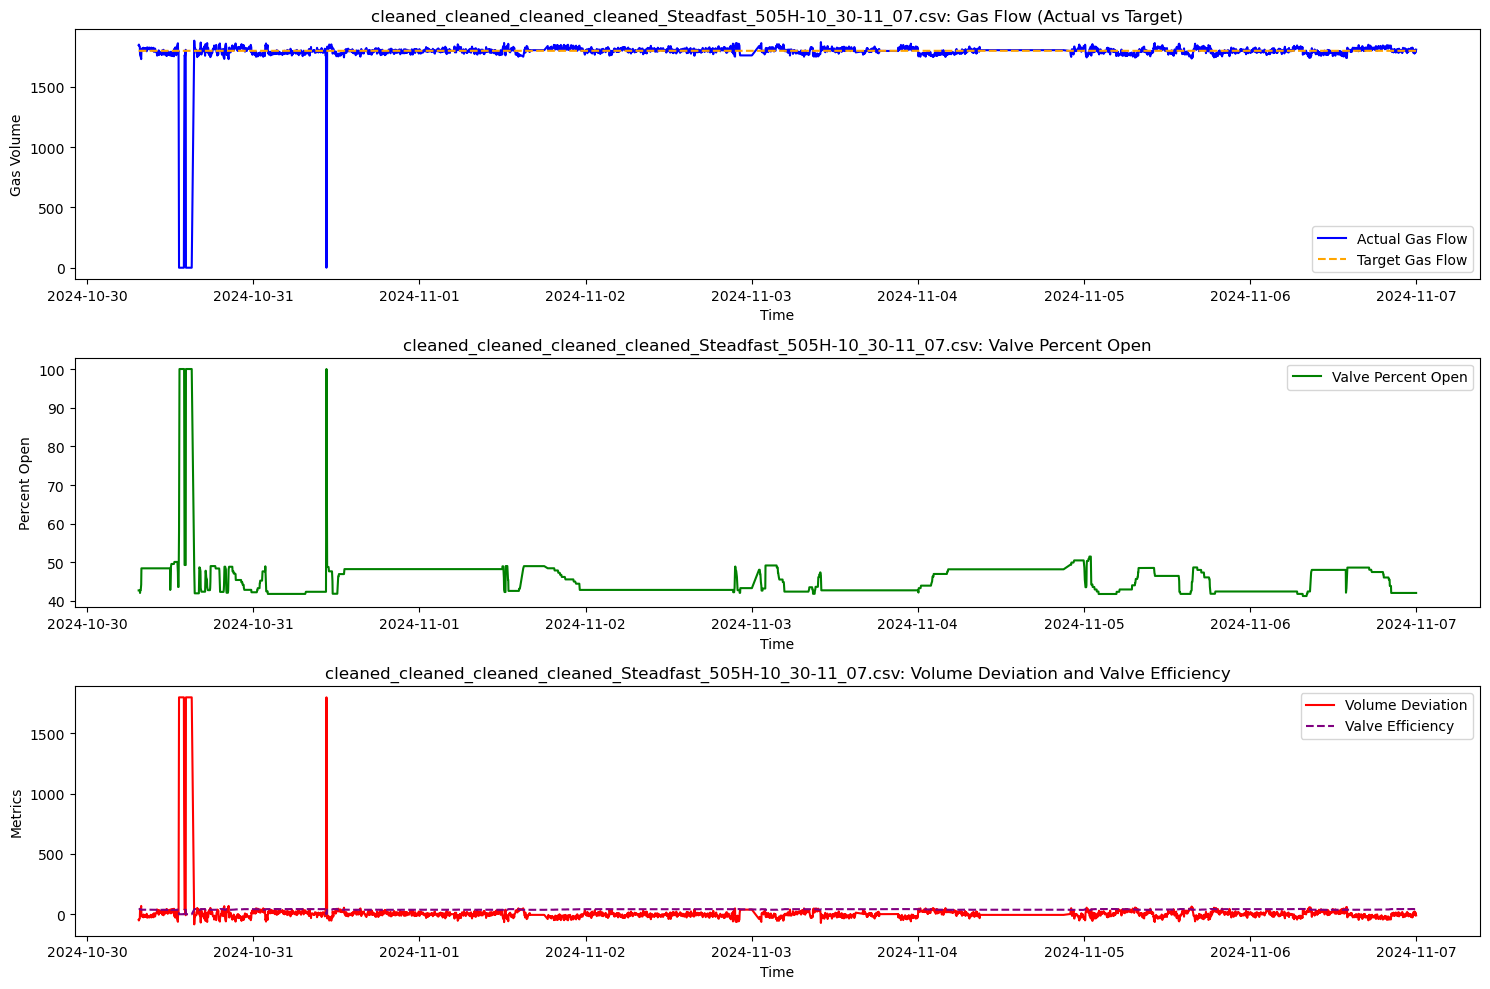

Visualizing: cleaned_cleaned_Courageous_729H-09_25-09_28.csv


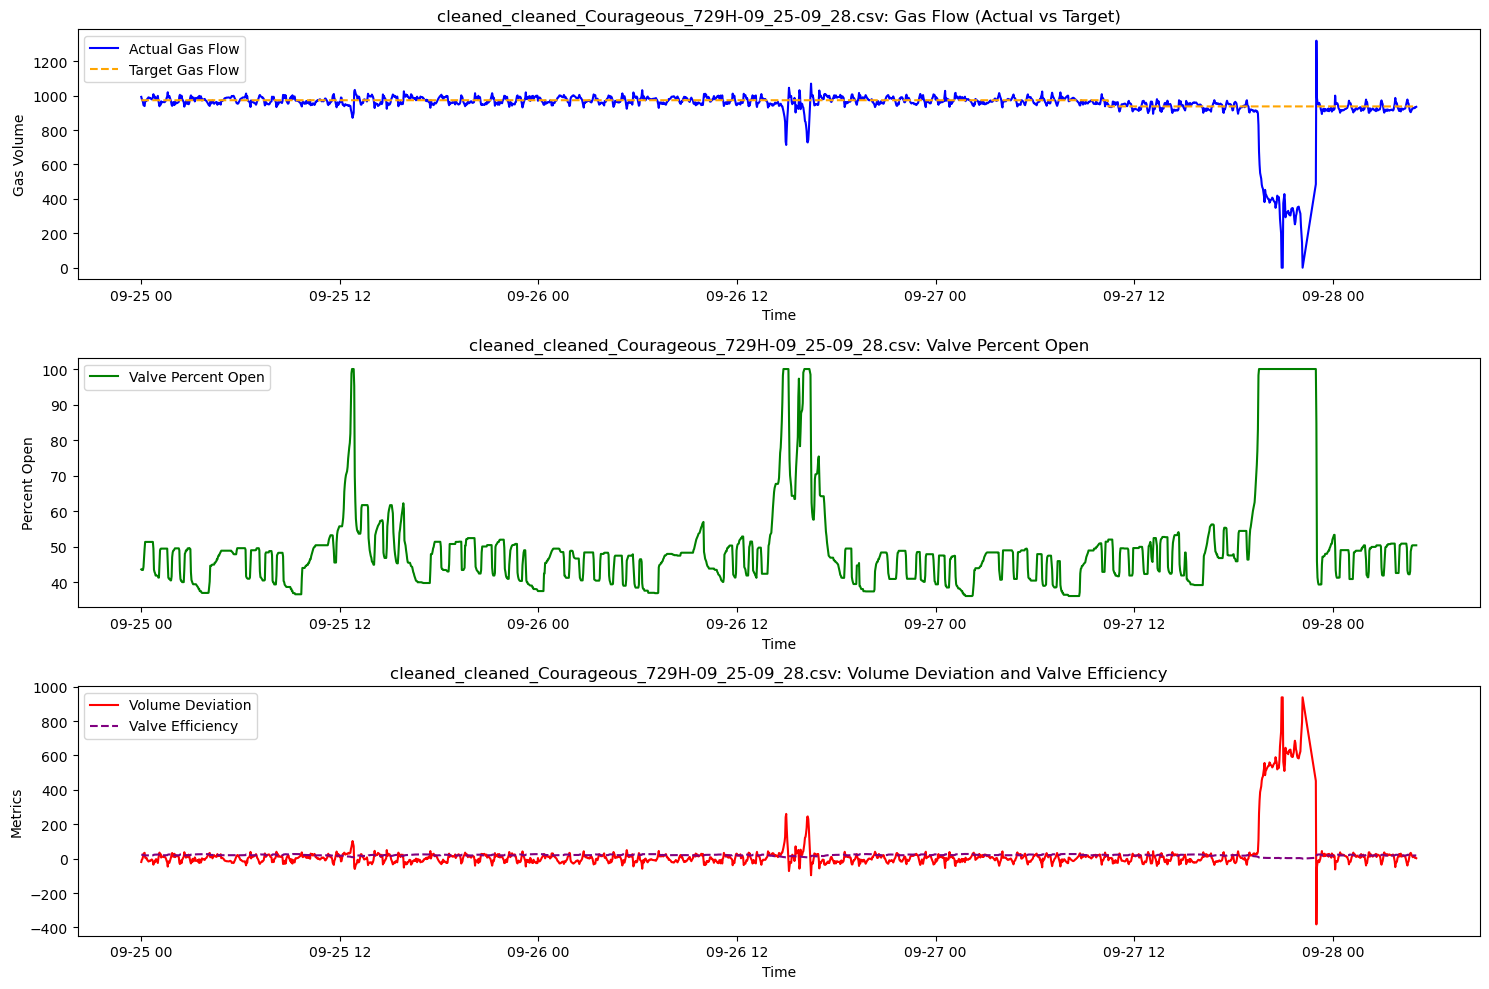

Visualizing: cleaned_Ruthless_745H-10_01-10_08.csv


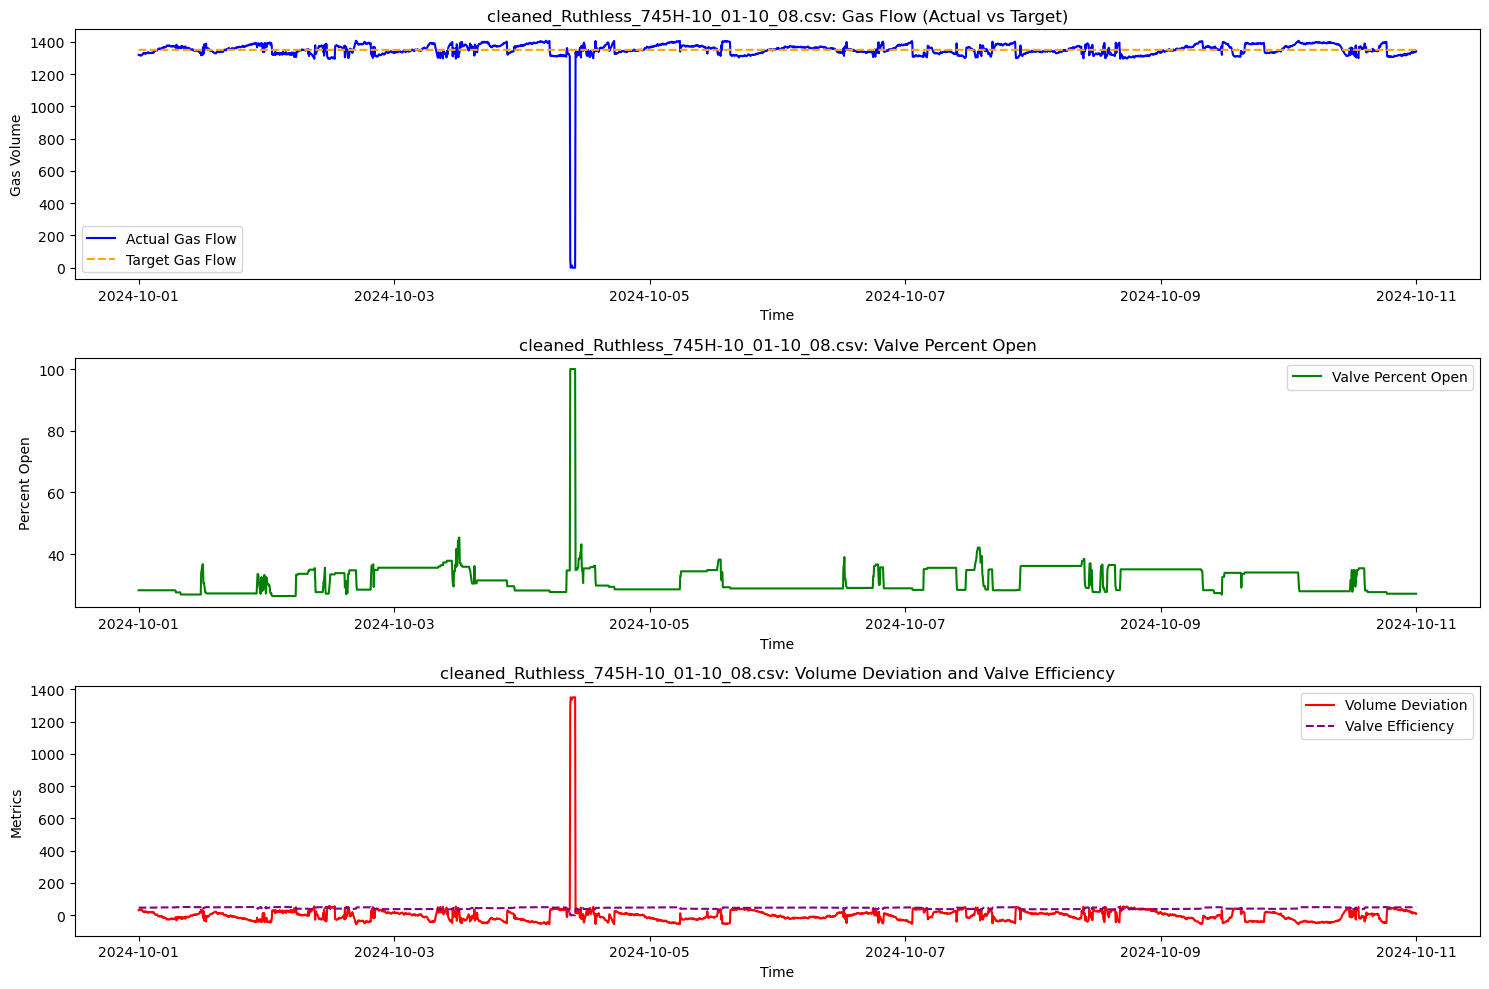

Visualizing: cleaned_cleaned_copy.csv


In [ ]:
import matplotlib.pyplot as plt

# Function to plot key metrics from the dataset
def plot_metrics(df, title="Dataset"):
    # Convert 'Time' column to datetime for proper plotting
    df['Time'] = pd.to_datetime(df['Time'])
    
    # Plot Time-Series Data
    plt.figure(figsize=(15, 10))

    # Subplot 1: Actual vs Target Gas Flow
    plt.subplot(3, 1, 1)
    plt.plot(df['Time'], df['Inj Gas Meter Volume Instantaneous'], label='Actual Gas Flow', color='blue')
    plt.plot(df['Time'], df['Inj Gas Meter Volume Setpoint'], label='Target Gas Flow', color='orange', linestyle='--')
    plt.title(f'{title}: Gas Flow (Actual vs Target)')
    plt.xlabel('Time')
    plt.ylabel('Gas Volume')
    plt.legend()

    # Subplot 2: Valve Percent Open
    plt.subplot(3, 1, 2)
    plt.plot(df['Time'], df['Inj Gas Valve Percent Open'], label='Valve Percent Open', color='green')
    plt.title(f'{title}: Valve Percent Open')
    plt.xlabel('Time')
    plt.ylabel('Percent Open')
    plt.legend()

    # Subplot 3: Volume Deviation and Valve Efficiency
    plt.subplot(3, 1, 3)
    plt.plot(df['Time'], df['Volume Deviation'], label='Volume Deviation', color='red')
    plt.plot(df['Time'], df['Valve Efficiency'], label='Valve Efficiency', color='purple', linestyle='--')
    plt.title(f'{title}: Volume Deviation and Valve Efficiency')
    plt.xlabel('Time')
    plt.ylabel('Metrics')
    plt.legend()

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Visualize data for all cleaned datasets
for filename, cleaned_df in final_cleaned_dataframes.items():
    print(f"Visualizing: {filename}")
    plot_metrics(cleaned_df, title=filename)


In [ ]:
df.head()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.ensemble import RandomForestClassifier


In [ ]:
def detect_hydrate(df, volume_deviation_threshold, valve_efficiency_threshold):
    df['Hydrate_Flag'] = (
        (df['Volume Deviation'] > volume_deviation_threshold) & 
        (df['Valve Efficiency'] < valve_efficiency_threshold)
    )
    return df

# Apply rules to all datasets
thresholds = {'volume_deviation': 10, 'valve_efficiency': 5}  # Adjust thresholds based on your observations
for filename, cleaned_df in final_cleaned_dataframes.items():
    print(f"Detecting hydrates for: {filename}")
    detected_df = detect_hydrate(cleaned_df, 
                                 thresholds['volume_deviation'], 
                                 thresholds['valve_efficiency'])
    print(f"Hydrate events detected: {detected_df['Hydrate_Flag'].sum()}")


In [ ]:
results_summary = []
for filename, cleaned_df in final_cleaned_dataframes.items():
    detected_df = detect_hydrate(cleaned_df, 
                                 thresholds['volume_deviation'], 
                                 thresholds['valve_efficiency'])
    hydrate_count = detected_df['Hydrate_Flag'].sum()
    results_summary.append({'File': filename, 'Hydrate Events': hydrate_count})

results_df = pd.DataFrame(results_summary)
print(results_df)


In [ ]:
import matplotlib.pyplot as plt

for filename, cleaned_df in final_cleaned_dataframes.items():
    detected_df = detect_hydrate(cleaned_df, 
                                 thresholds['volume_deviation'], 
                                 thresholds['valve_efficiency'])
    plt.figure(figsize=(10, 6))
    plt.plot(detected_df['Time'], detected_df['Volume Deviation'], label='Volume Deviation')
    plt.plot(detected_df['Time'], detected_df['Valve Efficiency'], label='Valve Efficiency')
    plt.scatter(detected_df['Time'][detected_df['Hydrate_Flag'] == True], 
                detected_df['Volume Deviation'][detected_df['Hydrate_Flag'] == True], 
                color='red', label='Hydrate Events', marker='x')
    plt.title(f'Hydrate Events in {filename}')
    plt.legend()
    plt.show()


In [ ]:
df.head()

In [ ]:
# pip install imbalanced-learn


In [ ]:
# import numpy as np

# def augment_time_series(X, factor=5, noise_level=0.01):
#     augmented_X = []
#     for _ in range(factor):
#         noisy_X = X + noise_level * np.random.normal(size=X.shape)
#         augmented_X.append(noisy_X)
#     return np.vstack(augmented_X)

# # Augment minority class
# minority_X = X_train[y_train == 1]
# augmented_minority_X = augment_time_series(minority_X, factor=5)

# # Combine augmented minority data with majority class
# X_train_balanced = np.vstack([X_train, augmented_minority_X])
# y_train_balanced = np.hstack([y_train, np.ones(len(augmented_minority_X))])

# print("Class distribution after augmentation:")
# print(pd.Series(y_train_balanced).value_counts())


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix

# # Train a cost-sensitive model
# model = RandomForestClassifier(class_weight={0: 1, 1: 100}, random_state=42)
# model.fit(X_train, y_train)

# # Evaluate
# y_pred = model.predict(X_test)
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))


In [ ]:
# from imblearn.ensemble import BalancedRandomForestClassifier

# # Train Balanced Random Forest
# model = BalancedRandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# # Evaluate
# y_pred = model.predict(X_test)
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))


In [ ]:
# from sklearn.metrics import precision_recall_curve, average_precision_score

# precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# pr_auc = average_precision_score(y_test, y_pred)
# print(f"Precision-Recall AUC: {pr_auc}")


In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, stratify=y, random_state=42
# )

# print("Class distribution in y_train:")
# print(y_train.value_counts())

# print("Class distribution in y_test:")
# print(y_test.value_counts())


In [ ]:
# from sklearn.model_selection import StratifiedKFold, cross_val_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import make_scorer, roc_auc_score

# # Custom scoring function to handle missing classes gracefully
# def safe_roc_auc(y_true, y_score):
#     try:
#         return roc_auc_score(y_true, y_score)
#     except ValueError:
#         return 0.5  # Assign a neutral score if one class is missing

# roc_scorer = make_scorer(safe_roc_auc, needs_proba=True)

# # StratifiedKFold ensures balanced class distribution
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# model = RandomForestClassifier(random_state=42)

# scores = cross_val_score(model, X, y, cv=cv, scoring=roc_scorer)
# print(f"Mean ROC-AUC Score: {scores.mean()}")


In [ ]:
# from sklearn.metrics import precision_recall_curve, auc

# # Train model
# model.fit(X_train, y_train)
# y_proba = model.predict_proba(X_test)[:, 1]

# # Calculate precision-recall curve and PR-AUC
# precision, recall, _ = precision_recall_curve(y_test, y_proba)
# pr_auc = auc(recall, precision)

# print(f"Precision-Recall AUC: {pr_auc}")

# # Plot the precision-recall curve
# import matplotlib.pyplot as plt
# plt.plot(recall, precision, label="PR Curve")
# plt.xlabel("Recall")
# plt.ylabel("Precision")
# plt.title("Precision-Recall Curve")
# plt.legend()
# plt.show()


In [ ]:
# model = RandomForestClassifier(class_weight="balanced", random_state=42)
# model.fit(X_train, y_train)

# # Evaluate performance
# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))


In [ ]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import classification_report, roc_auc_score

# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# for train_index, test_index in skf.split(X, y):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     y_proba = model.predict_proba(X_test)[:, 1]

#     print(classification_report(y_test, y_pred))
#     print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba)}")


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import precision_recall_curve, auc, classification_report

# # Stratified split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, stratify=y, random_state=42
# )

# # Train model
# model.fit(X_train, y_train)

# # Predictions and probabilities
# y_pred = model.predict(X_test)
# y_proba = model.predict_proba(X_test)[:, 1]

# # Precision-Recall AUC
# precision, recall, _ = precision_recall_curve(y_test, y_proba)
# pr_auc = auc(recall, precision)
# print(f"Precision-Recall AUC: {pr_auc}")

# # Classification report
# print(classification_report(y_test, y_pred))


In [ ]:
# from sklearn.model_selection import StratifiedKFold, cross_val_score
# from sklearn.metrics import make_scorer, f1_score

# skf = StratifiedKFold(n_splits=5)
# f1_scorer = make_scorer(f1_score, pos_label=1)

# scores = cross_val_score(model, X, y, cv=skf, scoring=f1_scorer)
# print(f"F1-Score for each fold: {scores}")
# print(f"Mean F1-Score: {scores.mean()}")


In [ ]:
# y_pred = model.predict(X_test)
# print("False Positives:", X_test[(y_test == 0) & (y_pred == 1)])
# print("False Negatives:", X_test[(y_test == 1) & (y_pred == 0)])


In [ ]:
# import matplotlib.pyplot as plt

# feature_importances = model.feature_importances_
# plt.barh(X.columns, feature_importances)
# plt.xlabel("Feature Importance")
# plt.title("Feature Importance for Hydrate Event Prediction")
# plt.show()


In [ ]:
# # Manually duplicate minority samples
# minority_samples = X_train[y_train == 1]
# minority_labels = y_train[y_train == 1]

# # Number of times to duplicate minority class
# duplication_factor = 20  

# for _ in range(duplication_factor):
#     X_train = pd.concat([X_train, minority_samples], axis=0)
#     y_train = pd.concat([y_train, minority_labels], axis=0)

# print("Class distribution after manual duplication:")
# print(y_train.value_counts())


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train model with class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [ ]:
# from imblearn.ensemble import EasyEnsembleClassifier
# from sklearn.metrics import classification_report, confusion_matrix

# # Initialize and train the model
# model = EasyEnsembleClassifier(n_estimators=10, random_state=42)
# model.fit(X_train, y_train)

# # Predict and evaluate
# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))


In [ ]:

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, stratify=y, random_state=42
# )


In [ ]:
# from sklearn.model_selection import StratifiedKFold, cross_val_score

# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# scores = cross_val_score(model, X, y, cv=skf, scoring='f1_macro')
# print(f"Cross-Validation F1 Scores: {scores}")
# print(f"Mean F1 Score: {scores.mean()}")


In [ ]:
# from sklearn.metrics import precision_recall_curve, auc
# import matplotlib.pyplot as plt

# y_proba = model.predict_proba(X_test)[:, 1]
# precision, recall, _ = precision_recall_curve(y_test, y_proba)
# pr_auc = auc(recall, precision)

# print(f"Precision-Recall AUC: {pr_auc}")
# plt.plot(recall, precision, label="PR Curve")
# plt.xlabel("Recall")
# plt.ylabel("Precision")
# plt.title("Precision-Recall Curve")
# plt.legend()
# plt.show()


In [ ]:
# from sklearn.utils import resample

# # Downsample the majority class
# majority_class = cleaned_df[cleaned_df['Hydrate_Flag'] == 0]
# minority_class = cleaned_df[cleaned_df['Hydrate_Flag'] == 1]
# majority_downsampled = resample(
#     majority_class,
#     replace=False,
#     n_samples=len(minority_class) * 10,  # Adjust as necessary
#     random_state=42
# )
# balanced_df = pd.concat([majority_downsampled, minority_class])


In [ ]:
# from sklearn.utils import resample

# # Downsample the majority class
# majority_class = cleaned_df[cleaned_df['Hydrate_Flag'] == 0]
# minority_class = cleaned_df[cleaned_df['Hydrate_Flag'] == 1]
# majority_downsampled = resample(
#     majority_class,
#     replace=False,
#     n_samples=len(minority_class) * 10,  # Adjust as necessary
#     random_state=42
# )
# balanced_df = pd.concat([majority_downsampled, minority_class])


In [ ]:
# scoring = {'pr_auc': 'average_precision'}
# cross_validate(model, X, y, cv=skf, scoring=scoring)


In [ ]:
# majority_downsampled = resample(
#     majority_class,
#     replace=False,
    
#     n_samples=len(minority_class) * 15,  # Increase the multiplier
#     random_state=42
# )
# balanced_df = pd.concat([majority_downsampled, minority_class])


In [ ]:
# majority_downsampled = resample(
#     majority_class,
#     replace=False,
#     n_samples=len(minority_class) * 15,  # Increase the multiplier
#     random_state=42
# )
# balanced_df = pd.concat([majority_downsampled, minority_class])


In [ ]:
# majority_downsampled = resample(
#     majority_class,
#     replace=False,
#     n_samples=len(minority_class) * 15,  # Increase the multiplier
#     random_state=42
# )
# balanced_df = pd.concat([majority_downsampled, minority_class])


In [ ]:
# majority_downsampled = resample(
#     majority_class,
#     replace=False,
#     n_samples=len(minority_class) * 15,  # Increase the multiplier
#     random_state=42
# )
# balanced_df = pd.concat([majority_downsampled, minority_class])


In [ ]:
# majority_downsampled = resample(
#     majority_class,
#     replace=False,
#     n_samples=len(minority_class) * 15,  # Increase the multiplier
#     random_state=42
# )
# balanced_df = pd.concat([majority_downsampled, minority_class])


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix, make_scorer, average_precision_score
# from sklearn.preprocessing import StandardScaler

# # Load the dataset (replace with your dataset loading code)
# # df = pd.read_csv('your_dataset.csv')

# # Drop datetime columns or irrelevant non-numerical columns
# numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
# X = df[numerical_columns]

# # Ensure no datetime or object columns exist
# print("Columns after filtering numerical data:")
# print(X.columns)

# # Define the target variable (replace 'Hydrate_Flag' with the correct target column name)
# y = df['Hydrate_Flag']  # Adjust this column name as necessary

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, stratify=y, random_state=42
# )

# # Standardize the data (if necessary)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Train a Random Forest model
# model = RandomForestClassifier(class_weight='balanced', random_state=42)
# model.fit(X_train, y_train)

# # Evaluate the model
# y_pred = model.predict(X_test)
# print("Classification Report:")
# print(classification_report(y_test, y_pred))
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

# # Cross-validation with PR-AUC scoring
# pr_auc_scorer = make_scorer(average_precision_score, needs_proba=True)
# cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring=pr_auc_scorer)
# print("\nCross-Validation PR-AUC Scores:", cv_scores)
# print("Mean PR-AUC Score:", cv_scores.mean())

# # Plot feature importances (optional)
# import matplotlib.pyplot as plt
# feature_importances = model.feature_importances_
# plt.barh(numerical_columns, feature_importances)
# plt.xlabel("Feature Importance")
# plt.title("Feature Importance for Hydrate Event Prediction")
# plt.show()


In [ ]:
# print(df.columns)


In [ ]:
# # Define conditions for Hydrate_Flag
# volume_deviation_threshold = 10  # Adjust threshold based on your analysis
# valve_efficiency_threshold = 5   # Adjust threshold based on your analysis

# # Create Hydrate_Flag
# df['Hydrate_Flag'] = (
#     (df['Volume Deviation'] > volume_deviation_threshold) &
#     (df['Valve Efficiency'] < valve_efficiency_threshold)
# ).astype(int)

# # Verify the target column
# print(df['Hydrate_Flag'].value_counts())


In [ ]:
# X = df[['Volume Deviation', 'Valve Efficiency']]  # Select features
# y = df['Hydrate_Flag']                            # Target variable

# # Split the dataset
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, stratify=y, random_state=42
# )

# print("Training data class distribution:")
# print(y_train.value_counts())


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix

# # Train with class weights
# model = RandomForestClassifier(class_weight='balanced', random_state=42)
# model.fit(X_train, y_train)

# # Evaluate the model
# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix

# # Train with class weights
# model = RandomForestClassifier(class_weight='balanced', random_state=42)
# model.fit(X_train, y_train)

# # Evaluate the model
# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix

# # Train with class weights
# model = RandomForestClassifier(class_weight='balanced', random_state=42)
# model.fit(X_train, y_train)

# # Evaluate the model
# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))


In [ ]:
# df['Volume Deviation Lag1'] = df['Volume Deviation'].shift(1)
# df['Valve Efficiency Lag1'] = df['Valve Efficiency'].shift(1)


In [ ]:
# from sklearn.model_selection import StratifiedKFold, cross_val_score

# skf = StratifiedKFold(n_splits=5)
# scores = cross_val_score(
#     model, X, y, cv=skf, scoring='precision_macro'  # or another metric
# )
# print(f"Cross-Validation Scores: {scores}")


In [ ]:
# import matplotlib.pyplot as plt

# feature_importances = model.feature_importances_
# plt.barh(X.columns, feature_importances)
# plt.xlabel("Feature Importance")
# plt.title("Feature Importance for Hydrate Event Prediction")
# plt.show()


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report

# # Train a Random Forest model
# model = RandomForestClassifier(class_weight='balanced', random_state=42)
# model.fit(X_train, y_train)

# # Evaluate the model
# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))


In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=5)
# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)


In [ ]:
# from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

# y_proba = model.predict_proba(X_test)[:, 1]
# precision, recall, _ = precision_recall_curve(y_test, y_proba)
# pr_auc = auc(recall, precision)

# print(f"Precision-Recall AUC: {pr_auc}")


In [ ]:
# import pandas as pd

# # Define dummy data
# dummy_data = pd.DataFrame({
#     'Volume Deviation': [15, 5, 20, 2],  # Example deviations
#     'Valve Efficiency': [3, 7, 4, 8]    # Example efficiencies
# })

# print("Dummy Data:")
# print(dummy_data)


In [ ]:
# # Use the trained model to predict
# dummy_predictions = model.predict(dummy_data)

# print("Predictions on Dummy Data:")
# print(dummy_predictions)


In [ ]:
# import matplotlib.pyplot as plt

# # Visualize the predictions
# dummy_data['Predictions'] = dummy_predictions
# dummy_data.plot(kind='bar', figsize=(10, 5))
# plt.title("Dummy Data Predictions")
# plt.xticks(range(len(dummy_data)), labels=dummy_data.index)
# plt.ylabel("Hydrate_Flag")
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt

# # Visualize the predictions
# dummy_data['Predictions'] = dummy_predictions
# dummy_data.plot(kind='bar', figsize=(10, 5))
# plt.title("Dummy Data Predictions")
# plt.xticks(range(len(dummy_data)), labels=dummy_data.index)
# plt.ylabel("Hydrate_Flag")
# plt.show()


In [ ]:
# dummy_data = pd.DataFrame({
#     'Volume Deviation': [15, 5, 20, 2, 12],  # Example deviations
#     'Valve Efficiency': [3, 7, 4, 8, 2]    # Example efficiencies
# })


In [ ]:
# dummy_probabilities = model.predict_proba(dummy_data)[:, 1]
# print("Predicted Probabilities:")
# print(dummy_probabilities)


In [ ]:
# threshold = 0.3  # Adjust threshold as needed
# y_pred_adjusted = (dummy_probabilities >= threshold).astype(int)
# print(f"Predictions with threshold {threshold}: {y_pred_adjusted}")


In [ ]:
# import matplotlib.pyplot as plt

# plt.hist(dummy_probabilities, bins=10, alpha=0.7)
# plt.axvline(x=0.5, color='r', linestyle='--', label='Threshold')
# plt.title("Prediction Probability Distribution")
# plt.xlabel("Predicted Probability")
# plt.ylabel("Frequency")
# plt.legend()
# plt.show()


In [ ]:
# # Define ground truth for the dummy data
# y_true = [0, 0, 0, 0]  # Replace with actual labels if available


In [ ]:
# # Use the test dataset ground truth
# y_true = y_test


In [ ]:
# from sklearn.metrics import precision_score, recall_score, f1_score

# # Define thresholds to iterate over
# thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]

# # Use test dataset probabilities and ground truth
# test_probabilities = model.predict_proba(X_test)[:, 1]
# y_true = y_test  # Ensure y_test is properly defined from the earlier split

# # Iterate through thresholds and calculate metrics
# for thresh in thresholds:
#     y_pred_adjusted = (test_probabilities >= thresh).astype(int)
#     precision = precision_score(y_true, y_pred_adjusted)
#     recall = recall_score(y_true, y_pred_adjusted)
#     f1 = f1_score(y_true, y_pred_adjusted)
#     print(f"Threshold: {thresh}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")


In [ ]:
# import numpy as np
# from sklearn.utils.class_weight import compute_class_weight

# # Ensure classes are passed as a numpy array
# classes = np.array([0, 1])  # Convert classes to numpy.ndarray
# class_weights = compute_class_weight('balanced', classes=classes, y=y_train)

# # Convert the output to a dictionary for use in the model
# class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# print("Class Weights:", class_weight_dict)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Combine all cleaned DataFrames into a single DataFrame
combined_df = pd.concat(final_cleaned_dataframes.values(), ignore_index=True)

# Ensure 'Hydrate_Flag' column is present
if 'Hydrate_Flag' not in combined_df.columns:
    raise ValueError("Hydrate_Flag column not found. Please ensure the hydrate detection logic has been applied.")

# Prepare data
X = combined_df[['Volume Deviation', 'Valve Efficiency']].values
y = combined_df['Hydrate_Flag'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Reshape data for LSTM: Add timesteps and features dimensions
timesteps = 1  # You can modify this based on your use case
features = X_train.shape[1]

X_lstm_train = X_train.reshape((X_train.shape[0], timesteps, features))
X_lstm_test = X_test.reshape((X_test.shape[0], timesteps, features))

# Compute class weights for imbalance
classes = np.array([0, 1])  # Ensure classes are passed as a numpy array
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

print("Class Weights:", class_weight_dict)

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(128, activation='relu', input_shape=(timesteps, features), return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(64, activation='relu', return_sequences=False))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = lstm_model.fit(
    X_lstm_train, 
    y_train, 
    epochs=20, 
    batch_size=32, 
    validation_data=(X_lstm_test, y_test), 
    class_weight=class_weight_dict
)

# Evaluate the model
test_loss, test_accuracy = lstm_model.evaluate(X_lstm_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_prob = lstm_model.predict(X_lstm_test)  # Get probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Save the model architecture and weights
model_save_path = "lstm_model.h5"
lstm_model.save(model_save_path)

print(f"Model saved successfully to {model_save_path}")


In [ ]:
from keras.models import load_model

# Load the saved model
loaded_model = load_model("lstm_model.h5")

# Verify that the loaded model works
loaded_model.summary()


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

# Load the trained LSTM model
model_path = "lstm_model.h5"  # Replace with your saved model file path
lstm_model = load_model(model_path)

# Load the dummy dataset
dummy_file_path = "/Users/saicharanmerugu/Downloads/copy.csv"  # Replace with your dummy dataset file path
dummy_data = pd.read_csv(dummy_file_path)

# Handle missing values in the dummy dataset
def preprocess_dummy_data(df):
    # Fill missing values
    df['Inj Gas Meter Volume Setpoint'] = df['Inj Gas Meter Volume Setpoint'].fillna(method='ffill').fillna(method='bfill')
    df['Inj Gas Valve Percent Open'] = df['Inj Gas Valve Percent Open'].fillna(method='ffill').fillna(method='bfill')

    # Calculate derived features
    df['Volume Deviation'] = df['Inj Gas Meter Volume Setpoint'] - df['Inj Gas Meter Volume Instantaneous']
    epsilon = 1e-5  # Small value to prevent division by zero
    df['Valve Efficiency'] = df['Inj Gas Meter Volume Instantaneous'] / (df['Inj Gas Valve Percent Open'] + epsilon)

    # Drop rows with any remaining NaN values
    df = df.dropna()
    return df

# Preprocess the dummy data
processed_dummy_data = preprocess_dummy_data(dummy_data)

# Prepare data for prediction
X_dummy = processed_dummy_data[['Volume Deviation', 'Valve Efficiency']].values

# Reshape for LSTM input
timesteps = 1  # Match the timesteps used in training
features = X_dummy.shape[1]
X_dummy_lstm = X_dummy.reshape((X_dummy.shape[0], timesteps, features))

# Make predictions
dummy_predictions = lstm_model.predict(X_dummy_lstm)
dummy_predictions = (dummy_predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Append predictions to the DataFrame
processed_dummy_data['Predictions'] = dummy_predictions

# Display results
print("Processed Dummy Data with Predictions:")
print(processed_dummy_data)

# Save results to a CSV file
processed_dummy_data.to_csv("dummy_dataset_with_missing_values.csv", index=False)
print("Predictions saved to 'dummy_dataset_with_predictions.csv'")


In [ ]:
y_pred_prob = lstm_model.predict(X_lstm_test)
print(y_pred_prob)


In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_pred_prob, bins=10)
plt.title("Prediction Probabilities")
plt.show()


In [ ]:
print("Dummy Dataset Statistics:")
print(processed_dummy_data.describe())
print("Training Data Statistics:")
print(processed_dummy_data.describe())


In [ ]:
import pandas as pd
import numpy as np

# Load the dummy dataset (replace 'dummy_dataset.csv' with the actual file path)
dummy_dataset_path = '/Users/saicharanmerugu/Downloads/copy.csv'
dummy_data = pd.read_csv(dummy_dataset_path)

# Ensure preprocessing matches the training data preparation
dummy_data['Volume Deviation'] = dummy_data['Inj Gas Meter Volume Setpoint'] - dummy_data['Inj Gas Meter Volume Instantaneous']
epsilon = 1e-5
dummy_data['Valve Efficiency'] = dummy_data['Inj Gas Meter Volume Instantaneous'] / (dummy_data['Inj Gas Valve Percent Open'] + epsilon)

# Handle missing values or interpolation if needed
dummy_data = dummy_data.fillna(method='ffill').fillna(method='bfill')

# Prepare features for prediction
X_dummy = dummy_data[['Volume Deviation', 'Valve Efficiency']].values

# Reshape for LSTM model
timesteps = 1
features = X_dummy.shape[1]
X_lstm_dummy = X_dummy.reshape((X_dummy.shape[0], timesteps, features))

# Make predictions
dummy_predictions = lstm_model.predict(X_lstm_dummy)
dummy_data['Hydrate_Predicted'] = (dummy_predictions > 0.5).astype(int)

# Extract rows where Hydrate_Predicted is 1
hydration_events = dummy_data[dummy_data['Hydrate_Predicted'] == 1]

# Save to a new CSV file
hydration_events.to_csv('/Users/saicharanmerugu/Downloads/hydration_events.csv', index=False)
print("Hydration events saved to hydration_events.csv")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dummy dataset with predictions
dummy_file_path = "//Users/saicharanmerugu/Downloads/hydration_events.csv"
df = pd.read_csv(dummy_file_path)

# Ensure 'Time' column is in datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Function to plot hydrate events
def plot_hydrate_events(df, title="Hydrate Events"):
    plt.figure(figsize=(15, 10))
    
    # Plot Volume Deviation
    plt.plot(df['Time'], df['Volume Deviation'], label='Volume Deviation', color='blue', alpha=0.7)
    
    # Plot Valve Efficiency
    plt.plot(df['Time'], df['Valve Efficiency'], label='Valve Efficiency', color='orange', linestyle='--')
    
    # Highlight hydrate events
    hydrate_events = df[df['Hydrate_Predicted'] == 1]
    plt.scatter(hydrate_events['Time'], hydrate_events['Volume Deviation'], color='red', label='Hydrate Events', marker='x', s=100)
    
    # Add titles and labels
    plt.title(f"{title}", fontsize=14)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Metrics', fontsize=12)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Example: Plot for the current dataset
plot_hydrate_events(df, title="Hydrate Events in Dummy Dataset")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dummy dataset with predictions
dummy_file_path = "//Users/saicharanmerugu/Downloads/hydration_events.csv"
df = pd.read_csv(dummy_file_path)

# Ensure 'Time' column is in datetime format
if 'Time' in df.columns:
    df['Time'] = pd.to_datetime(df['Time'])
else:
    raise ValueError("The dataset does not contain a 'Time' column.")

# Ensure required columns exist
required_columns = ['Volume Deviation', 'Valve Efficiency', 'Hydrate_Predicted']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"The dataset is missing the required column: {col}")

# Function to plot hydrate events
def plot_hydrate_events(df, title="Hydrate Events", save_path=None):
    plt.figure(figsize=(15, 8))
    
    # Plot Volume Deviation
    plt.plot(
        df['Time'], df['Volume Deviation'],
        label='Volume Deviation', color='blue', alpha=0.7, linewidth=1.5
    )
    
    # Plot Valve Efficiency
    plt.plot(
        df['Time'], df['Valve Efficiency'],
        label='Valve Efficiency', color='orange', linestyle='--', linewidth=1.5
    )
    
    # Highlight hydrate events
    hydrate_events = df[df['Hydrate_Predicted'] == 1]
    if not hydrate_events.empty:
        plt.scatter(
            hydrate_events['Time'], hydrate_events['Volume Deviation'],
            color='red', label='Hydrate Events', marker='x', s=100, alpha=0.9
        )
    else:
        print("No hydrate events found in the dataset.")
    
    # Add titles and labels
    plt.title(f"{title}", fontsize=16, fontweight='bold')
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Metrics', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    
    # Save or show plot
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved at: {save_path}")
    plt.tight_layout()
    plt.show()

# Example: Plot for the current dataset
plot_hydrate_events(
    df, 
    title="Hydrate Events in Dummy Dataset",
    save_path="//Users/saicharanmerugu/Downloads/hydrate_events_plot.png"  # Optional: Specify save path
)
